# Miniscule sample of production code (training pipeline)
---
This notebook is mainly used as a sandbox and to visualize results of code fragments before adding them to the production pipeline

<br>
<hr>
<br>

<a id='toc'></a>
### Table of Contents
[1. Convert PDFs to images](#section-1)<br>
[2. Use PyTesseract for page segmentation](#section-2)<br>
[3. Extract images and leave out charts and graphs](#section-3)<br>
[4. Image preprocessing pre-ocr](#section-4)<br>
[5. Text extraction using OCR](#section-5)<br>
[6. Chemical structures extraction using OSRA](#section-6)<br>
[7. Extract chemical names (InChI) from text](#section-7)<br>
[8. Create Dataframe for text data](#section-8)<br>
[9. Calculating similarity for chemical compounds](#section-9)<br>
[10. Word embeddings](#section-10)<br>
[11. Train LSTM using document embeddings](#section-11)<br>
[12. Train CNN + LSTM using document embeddings](#section-12)<br>
<br>
<hr>

<a id='section-1'></a>
### - Convert PDFs to images

In [1]:
# Loading dependencies
from pdf2image import convert_from_path
from pdf2image.exceptions import (
    PDFInfoNotInstalledError,
    PDFPageCountError,
    PDFSyntaxError
)
import glob
import os
import multiprocessing

In [2]:
cores = multiprocessing.cpu_count() - 2

In [14]:
# Start converting pdf pages for patent documents into separate images

# Loop through documents in 'Similar' Group
for folder in glob.glob('../Dataset/Pairs/Similar/*'):
    
    # Create output folder
    if not os.path.exists('../processing/pairs/similar/{}'.format(str(folder[25:28]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/pairs/similar/{}'.format(str(folder[25:28])))
        
    # Loop through all documents in the folder and extract those 
    # starting with 'P-'
    for document in glob.glob('{}/P-*.pdf'.format(folder)):
        
        print('Processing file {}'.format(str(document[29:-4])))
        
        # Use pdf2img to convert pdfs to png images
        similar_patents_pages = convert_from_path('{}'.format(document), dpi=600, fmt='png',
                                 output_folder='../processing/pairs/similar/{}'.format(str(folder[25:28])),
                                output_file=str(document[29:-4]))

Processing file P-US009637794
Processing file P-US008865176
Processing file P-US008956617
Processing file P-US009717754
Processing file P-US009127284
Processing file P-US008788212
Processing file P-US008788212
Processing file P-US008865176
Processing file P-US010137091
Processing file P-US009682102
Processing file P-US010137091
Processing file P-US009314446
Processing file P-US009493570
Processing file P-US009682102
Processing file P-US009371517
Processing file P-US009371517
Processing file P-US008788212
Processing file P-US009717754
Processing file P-US008859240
Processing file P-US009637794
Processing file P-US009051394
Processing file P-US009371517
Processing file P-US009637794
Processing file P-US008900600
Processing file P-US009682102


In [ ]:
# Start converting pdf pages for patent documents into separate images

# Loop through documents in 'Referenced' Group
for folder in glob.glob('../Dataset/Pairs/Referenced/*'):

    # Create output folder
    if not os.path.exists('../processing/pairs/referenced/{}'.format(str(folder[28:31]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/pairs/referenced/{}'.format(str(folder[28:31])))
        
    # Loop through all documents in the folder and extract those 
    # starting with 'P-'
    for document in glob.glob('{}/P-*.pdf'.format(folder)):
        
        print('Processing file {}'.format(str(document[32:-4])))
        
        # Use pdf2img to convert pdfs to png images
        similar_patents_pages = convert_from_path('{}'.format(document), dpi=600, fmt='png',
                                 output_folder='../processing/pairs/referenced/{}'.format(str(folder[28:31])),
                                output_file=str(document[32:-4]))

In [22]:
# Start converting pdf pages for patent documents into separate images

# Loop through documents in 'Dissimilar' Group
for folder in glob.glob('../Dataset/Pairs/Dissimilar/*'):

    # Create output folder
    if not os.path.exists('../processing/pairs/dissimilar/{}'.format(str(folder[28:31]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/pairs/dissimilar/{}'.format(str(folder[28:31])))
    
    # Loop through all documents in the folder and extract those 
    # starting with 'P-'
    for document in glob.glob('{}/P-*.pdf'.format(folder)):
        
        print('Processing file {}'.format(str(document[32:-4])))
        
        # Use pdf2img to convert pdfs to png images
        similar_patents_pages = convert_from_path('{}'.format(document), dpi=600, fmt='png',
                                 output_folder='../processing/pairs/dissimilar/{}'.format(str(folder[28:31])),
                                output_file=str(document[32:-4]))

In [27]:
# Start converting pdf pages for application documents into separate images

# Loop through documents in 'Similar' Group
for folder in glob.glob('../Dataset/Pairs/Similar/*'):
    
    # Create output folder
    if not os.path.exists('../processing/pairs/similar/{}'.format(str(folder[25:28]))):

        # If folder does not exist, create it
        os.makedirs('../processing/pairs/similar/{}'.format(str(folder[25:28])))
        
    # Loop through all documents in the folder and extract those 
    # starting with 'A-'
    for document in glob.glob('{}/A-*.pdf'.format(folder)):
            
        print('Processing file {}'.format(str(document[29:-4])))

        # Use pdf2img to convert pdfs to png images
        similar_patents_pages = convert_from_path('{}'.format(document), dpi=600, fmt='png',
                                 output_folder='../processing/pairs/similar/{}'.format(str(folder[25:28])),
                                output_file=str(document[29:-4]))

In [28]:
# Start converting pdf pages for application documents into separate images

# Loop through documents in 'Referenced' Group
for folder in glob.glob('../Dataset/Pairs/Referenced/*'):

    # Create output folder
    if not os.path.exists('../processing/pairs/referenced/{}'.format(str(folder[28:31]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/pairs/referenced/{}'.format(str(folder[28:31])))
    
    # Loop through all documents in the folder and extract those 
    # starting with 'A-'
    for document in glob.glob('{}/A-*.pdf'.format(folder)):
        
        print('Processing file {}'.format(str(document[32:-4])))

        # Use pdf2img to convert pdfs to png images
        similar_patents_pages = convert_from_path('{}'.format(document), dpi=600, fmt='png',
                                 output_folder='../processing/pairs/referenced/{}'.format(str(folder[28:31])),
                                output_file=str(document[32:-4]))

In [29]:
# Start converting pdf pages for application documents into separate images

# Loop through documents in 'Dissimilar' Group
for folder in glob.glob('../Dataset/Pairs/Dissimilar/*'):

    # Create output folder
    if not os.path.exists('../processing/pairs/dissimilar/{}'.format(str(folder[28:31]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/pairs/dissimilar/{}'.format(str(folder[28:31])))
    
    # Loop through all documents in the folder and extract those 
    # starting with 'A-'
    for document in glob.glob('{}/A-*.pdf'.format(folder)):
        
        print('Processing file {}'.format(str(document[32:-4])))

        # Use pdf2img to convert pdfs to png images
        similar_patents_pages = convert_from_path('{}'.format(document), dpi=600, fmt='png',
                                 output_folder='../processing/pairs/dissimilar/{}'.format(str(folder[28:31])),
                                output_file=str(document[32:-4]))

<hr>

[Top](#toc)

<br>

<a id='section-2'></a>

### - Use PyTesseract for page segmentation

In [17]:
# Loading dependencies
from PIL import Image
import pytesseract
import cv2
from matplotlib import pyplot as plt
import numpy as np
import glob
import os

In [20]:
# Start segmenting page images for patent documents

# Loop through documents in 'Similar' Group
for folder in glob.glob('../processing/pairs/similar/*'):

    # Create output folder
    if not os.path.exists('../processing/segments/similar/{}'.format(str(folder[28:31]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/segments/similar/{}'.format(str(folder[28:31])))
    
    # Loop through all images in folder    
    for image in glob.glob('{}/P-*'.format(str(folder))):
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/segments/similar/{}/{}.png'.format(str(folder[28:31]), 
                                                                                 str(image[32:-4]))):
            
            print('Processing image {}'.format(str(image[32:-4])))

            # Read the image and get the dimensions
            img2 = cv2.imread(image)
            h, w, _ = img2.shape

            # Run tesseract method to get bounding boxes around recognized characters
            boxes = pytesseract.image_to_boxes(
                Image.open(image))

            # Loop through all bounding boxes
            for b in boxes.splitlines():
                b = b.split(' ')

                # Extract figures from a page and save them
                images = []

                # Check for dimensions of bound box, if they exceed 800px for width and height
                # consider the box containing a figure and crop it out
                if (int(b[3]) - int(b[1]) > 800) and ((h - int(b[2])) - (h - int(b[4])) > 800):
                    images.append([int(b[2]), int(b[4]), int(b[1]), int(b[3])])
                    crop = img2[images[0][0]:images[0][1], images[0][2]:images[0][3]]

                    # Write image to disk
                    plt.imsave('../processing/segments/similar/{}/{}.png'.format(str(folder[28:31]), 
                                                                                 str(image[32:-4])), crop)

Processing image P-US009637794-40
Processing image P-US009637794-83
Processing image P-US009637794-22
Processing image P-US009637794-20
Processing image P-US009637794-21
Processing image P-US009637794-64
Processing image P-US009637794-45
Processing image P-US009637794-34
Processing image P-US009637794-25
Processing image P-US009637794-06
Processing image P-US009637794-28
Processing image P-US009637794-44
Processing image P-US009637794-73
Processing image P-US009637794-30
Processing image P-US009637794-63
Processing image P-US009637794-82
Processing image P-US009637794-68
Processing image P-US009637794-80
Processing image P-US009637794-29
Processing image P-US009637794-08
Processing image P-US009637794-58
Processing image P-US009637794-54
Processing image P-US009637794-39
Processing image P-US009637794-46
Processing image P-US009637794-86
Processing image P-US009637794-62
Processing image P-US009637794-65
Processing image P-US009637794-53
Processing image P-US009637794-84
Processing ima

Processing image P-US008788212-231
Processing image P-US008788212-081
Processing image P-US008788212-097
Processing image P-US008788212-112
Processing image P-US008788212-011
Processing image P-US008788212-075
Processing image P-US008788212-020
Processing image P-US008788212-180
Processing image P-US008788212-037
Processing image P-US008788212-170
Processing image P-US008788212-209
Processing image P-US008788212-096
Processing image P-US008788212-017
Processing image P-US008788212-040
Processing image P-US008788212-007
Processing image P-US008788212-165
Processing image P-US008788212-182
Processing image P-US008788212-041
Processing image P-US008788212-069
Processing image P-US008788212-059
Processing image P-US008788212-138
Processing image P-US008788212-164
Processing image P-US008788212-181
Processing image P-US008788212-178
Processing image P-US008788212-036
Processing image P-US008788212-217
Processing image P-US008788212-163
Processing image P-US008788212-001
Processing image P-U

Processing image P-US008788212-167
Processing image P-US008788212-231
Processing image P-US008788212-081
Processing image P-US008788212-097
Processing image P-US008788212-112
Processing image P-US008788212-011
Processing image P-US008788212-075
Processing image P-US008788212-020
Processing image P-US008788212-180
Processing image P-US008788212-037
Processing image P-US008788212-170
Processing image P-US008788212-209
Processing image P-US008788212-096
Processing image P-US008788212-017
Processing image P-US008788212-040
Processing image P-US008788212-007
Processing image P-US008788212-165
Processing image P-US008788212-182
Processing image P-US008788212-041
Processing image P-US008788212-069
Processing image P-US008788212-059
Processing image P-US008788212-138
Processing image P-US008788212-164
Processing image P-US008788212-181
Processing image P-US008788212-178
Processing image P-US008788212-036
Processing image P-US008788212-217
Processing image P-US008788212-163
Processing image P-U

Processing image P-US008865176-25
Processing image P-US008865176-11
Processing image P-US008865176-10
Processing image P-US008865176-29
Processing image P-US008865176-07
Processing image P-US008865176-06
Processing image P-US008865176-14
Processing image P-US008865176-01
Processing image P-US008865176-27
Processing image P-US008865176-02
Processing image P-US008865176-09
Processing image P-US008865176-18
Processing image P-US008865176-04
Processing image P-US008865176-19
Processing image P-US008865176-24
Processing image P-US008865176-26
Processing image P-US008865176-30
Processing image P-US008865176-31
Processing image P-US008865176-17
Processing image P-US008865176-08
Processing image P-US008865176-23
Processing image P-US008865176-21
Processing image P-US010137091-01
Processing image P-US010137091-03
Processing image P-US010137091-13
Processing image P-US010137091-08
Processing image P-US010137091-11
Processing image P-US010137091-14
Processing image P-US010137091-12
Processing ima

Processing image P-US009371517-196
Processing image P-US009371517-176
Processing image P-US009371517-099
Processing image P-US009371517-030
Processing image P-US009371517-081
Processing image P-US009371517-057
Processing image P-US009371517-159
Processing image P-US009371517-171
Processing image P-US009371517-140
Processing image P-US009371517-088
Processing image P-US009371517-155
Processing image P-US009371517-043
Processing image P-US009371517-051
Processing image P-US009371517-113
Processing image P-US009371517-126
Processing image P-US009371517-045
Processing image P-US009371517-063
Processing image P-US009371517-095
Processing image P-US009371517-146
Processing image P-US009371517-161
Processing image P-US009371517-042
Processing image P-US009371517-049
Processing image P-US009371517-097
Processing image P-US009371517-116
Processing image P-US009371517-144
Processing image P-US009371517-192
Processing image P-US009371517-013
Processing image P-US009371517-179
Processing image P-U

Processing image P-US009371517-113
Processing image P-US009371517-126
Processing image P-US009371517-045
Processing image P-US009371517-063
Processing image P-US009371517-095
Processing image P-US009371517-146
Processing image P-US009371517-161
Processing image P-US009371517-042
Processing image P-US009371517-049
Processing image P-US009371517-097
Processing image P-US009371517-116
Processing image P-US009371517-144
Processing image P-US009371517-192
Processing image P-US009371517-013
Processing image P-US009371517-179
Processing image P-US009371517-147
Processing image P-US009371517-062
Processing image P-US009371517-046
Processing image P-US009371517-219
Processing image P-US009371517-054
Processing image P-US009371517-128
Processing image P-US009371517-040
Processing image P-US009371517-001
Processing image P-US009371517-114
Processing image P-US009371517-178
Processing image P-US009371517-197
Processing image P-US009371517-190
Processing image P-US009371517-086
Processing image P-U

Processing image P-US008788212-074
Processing image P-US008788212-132
Processing image P-US008788212-052
Processing image P-US008788212-056
Processing image P-US008788212-139
Processing image P-US008788212-068
Processing image P-US008788212-223
Processing image P-US008788212-116
Processing image P-US008788212-009
Processing image P-US008788212-045
Processing image P-US008788212-152
Processing image P-US008788212-215
Processing image P-US008788212-092
Processing image P-US008788212-028
Processing image P-US008788212-162
Processing image P-US008788212-032
Processing image P-US008788212-189
Processing image P-US008788212-083
Processing image P-US008788212-233
Processing image P-US008788212-118
Processing image P-US008788212-023
Processing image P-US008788212-012
Processing image P-US008788212-144
Processing image P-US008788212-099
Processing image P-US008788212-071
Processing image P-US008788212-113
Processing image P-US008788212-064
Processing image P-US008788212-161
Processing image P-U

Processing image P-US009637794-82
Processing image P-US009637794-68
Processing image P-US009637794-80
Processing image P-US009637794-29
Processing image P-US009637794-08
Processing image P-US009637794-58
Processing image P-US009637794-54
Processing image P-US009637794-39
Processing image P-US009637794-46
Processing image P-US009637794-86
Processing image P-US009637794-62
Processing image P-US009637794-65
Processing image P-US009637794-53
Processing image P-US009637794-84
Processing image P-US009637794-47
Processing image P-US009637794-01
Processing image P-US009637794-31
Processing image P-US009637794-09
Processing image P-US009637794-43
Processing image P-US009637794-38
Processing image P-US009637794-17
Processing image P-US009637794-57
Processing image P-US009637794-76
Processing image P-US009637794-33
Processing image P-US009637794-52
Processing image P-US009637794-55
Processing image P-US009637794-51
Processing image P-US009637794-88
Processing image P-US009637794-16
Processing ima

Processing image P-US009371517-011
Processing image P-US009371517-134
Processing image P-US009371517-077
Processing image P-US009371517-103
Processing image P-US009371517-104
Processing image P-US009371517-007
Processing image P-US009371517-185
Processing image P-US009371517-211
Processing image P-US009371517-041
Processing image P-US009371517-214
Processing image P-US009371517-221
Processing image P-US009371517-078
Processing image P-US009371517-118
Processing image P-US009371517-129
Processing image P-US009371517-200
Processing image P-US009371517-015
Processing image P-US009371517-027
Processing image P-US009371517-094
Processing image P-US009371517-184
Processing image P-US009371517-149
Processing image P-US009371517-065
Processing image P-US009371517-112
Processing image P-US009371517-135
Processing image P-US009371517-069
Processing image P-US009371517-206
Processing image P-US009371517-003
Processing image P-US009371517-038
Processing image P-US009371517-023
Processing image P-U

Processing image P-US009682102-02
Processing image P-US009682102-14
Processing image P-US009682102-09
Processing image P-US009682102-15
Processing image P-US009682102-12
Processing image P-US009682102-22
Processing image P-US009682102-16
Processing image P-US009682102-23
Processing image P-US009682102-20
Processing image P-US009682102-13
Processing image P-US009682102-18
Processing image P-US009682102-08


In [4]:
# Start segmenting page images for patent documents

# Loop through documents in 'Referenced' Group
for folder in glob.glob('../processing/pairs/referenced/*'):

    # Create output folder
    if not os.path.exists('../processing/segments/referenced/{}'.format(str(folder[31:34]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/segments/referenced/{}'.format(str(folder[31:34])))
    
    # Loop through all images in folder    
    for image in glob.glob('{}/P-*'.format(str(folder))):
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/segments/referenced/{}/{}.png'.format(str(folder[31:34]), 
                                                                             str(image[35:-4]))):
            
            print('Processing image {}'.format(str(image[32:-4])))

            # Read the image and get the dimensions
            img2 = cv2.imread(image)
            h, w, _ = img2.shape

            # Run tesseract method to get bounding boxes around recognized characters
            boxes = pytesseract.image_to_boxes(
                Image.open(image))

            # Loop through all bounding boxes
            for b in boxes.splitlines():
                b = b.split(' ')

                # Extract figures from a page and save them
                images = []

                # Check for dimensions of bound box, if they exceed 800px for width and height
                # consider the box containing a figure and crop it out
                if (int(b[3]) - int(b[1]) > 800) and ((h - int(b[2])) - (h - int(b[4])) > 800):
                    images.append([int(b[2]), int(b[4]), int(b[1]), int(b[3])])
                    crop = img2[images[0][0]:images[0][1], images[0][2]:images[0][3]]

                    # Write image to disk
                    plt.imsave('../processing/segments/referenced/{}/{}.png'.format(str(folder[31:34]), 
                                                                             str(image[35:-4])), crop)

In [ ]:
# Start segmenting page images for patent documents

# Loop through documents in 'Disimilar' Group
for folder in glob.glob('../processing/pairs/dissimilar/*'):

    # Create output folder
    if not os.path.exists('../processing/segments/dissimilar/{}'.format(str(folder[31:34]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/segments/dissimilar/{}'.format(str(folder[31:34])))
    
    # Loop through all images in folder    
    for image in glob.glob('{}/P-*'.format(str(folder))):
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/segments/dissimilar/{}/{}.png'.format(str(folder[31:34]), 
                                                                             str(image[35:-4]))):
            
            print('Processing image {}'.format(str(image[32:-4])))

            # Read the image and get the dimensions
            img2 = cv2.imread(image)
            h, w, _ = img2.shape

            # Run tesseract method to get bounding boxes around recognized characters
            boxes = pytesseract.image_to_boxes(
                Image.open(image))

            # Loop through all bounding boxes
            for b in boxes.splitlines():
                b = b.split(' ')

                # Extract figures from a page and save them
                images = []

                # Check for dimensions of bound box, if they exceed 800px for width and height
                # consider the box containing a figure and crop it out
                if (int(b[3]) - int(b[1]) > 800) and ((h - int(b[2])) - (h - int(b[4])) > 800):
                    images.append([int(b[2]), int(b[4]), int(b[1]), int(b[3])])
                    crop = img2[images[0][0]:images[0][1], images[0][2]:images[0][3]]

                    # Write image to disk
                    plt.imsave('../processing/segments/dissimilar/{}/{}.png'.format(str(folder[31:34]), 
                                                                                 str(image[35:-4])), crop)

In [ ]:
# Start segmenting page images for application documents

# Loop through documents in 'Similar' Group
for folder in glob.glob('../processing/pairs/similar/*'):

    # Create output folder
    if not os.path.exists('../processing/segments/similar/{}'.format(str(folder[28:31]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/segments/similar/{}'.format(str(folder[28:31])))
    
    # Loop through all images in folder    
    for image in glob.glob('{}/A-*'.format(str(folder))):
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/segments/similar/{}/{}.png'.format(str(folder[28:31]), 
                                                                             str(image[32:-4]))):
            
            print('Processing image {}'.format(str(image[32:-4])))

            # Read the image and get the dimensions
            img2 = cv2.imread(image)
            h, w, _ = img2.shape

            # Run tesseract method to get bounding boxes around recognized characters
            boxes = pytesseract.image_to_boxes(
                Image.open(image))

            # Loop through all bounding boxes
            for b in boxes.splitlines():
                b = b.split(' ')

                # Extract figures from a page and save them
                images = []

                # Check for dimensions of bound box, if they exceed 800px for width and height
                # consider the box containing a figure and crop it out
                if (int(b[3]) - int(b[1]) > 800) and ((h - int(b[2])) - (h - int(b[4])) > 800):
                    images.append([int(b[2]), int(b[4]), int(b[1]), int(b[3])])
                    crop = img2[images[0][0]:images[0][1], images[0][2]:images[0][3]]
                    
                    # Write image to disk
                    plt.imsave('../processing/segments/similar/{}/{}.png'.format(str(folder[28:31]), 
                                                                                 str(image[32:-4])), crop)

In [ ]:
# Start segmenting page images for application documents

# Loop through documents in 'Referenced' Group
for folder in glob.glob('../processing/pairs/referenced/*'):

    # Create output folder
    if not os.path.exists('../processing/segments/referenced/{}'.format(str(folder[31:34]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/segments/referenced/{}'.format(str(folder[31:34])))
    
    # Loop through all images in folder    
    for image in glob.glob('{}/A-*'.format(str(folder))):
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/segments/referenced/{}/{}.png'.format(str(folder[31:34]), 
                                                                             str(image[35:-4]))):
            
            print('Processing image {}'.format(str(image[35:-4])))

            # Read the image and get the dimensions
            img2 = cv2.imread(image)
            h, w, _ = img2.shape

            # Run tesseract method to get bounding boxes around recognized characters
            boxes = pytesseract.image_to_boxes(
                Image.open(image))

            # Loop through all bounding boxes
            for b in boxes.splitlines():
                b = b.split(' ')

                # Extract figures from a page and save them
                images = []

                # Check for dimensions of bound box, if they exceed 800px for width and height
                # consider the box containing a figure and crop it out
                if (int(b[3]) - int(b[1]) > 800) and ((h - int(b[2])) - (h - int(b[4])) > 800):
                    images.append([int(b[2]), int(b[4]), int(b[1]), int(b[3])])
                    crop = img2[images[0][0]:images[0][1], images[0][2]:images[0][3]]
                    
                    # Write image to disk
                    plt.imsave('../processing/segments/referenced/{}/{}.png'.format(str(folder[31:34]), 
                                                                                 str(image[35:-4])), crop)

In [ ]:
# Start segmenting page images for application documents

# Loop through documents in 'Dissimilar' Group
for folder in glob.glob('../processing/pairs/dissimilar/*'):

    # Create output folder
    if not os.path.exists('../processing/segments/dissimilar/{}'.format(str(folder[31:34]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/segments/dissimilar/{}'.format(str(folder[31:34])))
      
    # Loop through all images in folder
    for image in glob.glob('{}/A-*'.format(str(folder))):
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/segments/dissimilar/{}/{}.png'.format(str(folder[31:34]), 
                                                                             str(image[35:-4]))):
            
            print('Processing image {}'.format(str(image[35:-4])))

            # Read the image and get the dimensions
            img2 = cv2.imread(image)
            h, w, _ = img2.shape

            # Run tesseract method to get bounding boxes around recognized characters
            boxes = pytesseract.image_to_boxes(
                Image.open(image))

            # Loop through all bounding boxes
            for b in boxes.splitlines():
                b = b.split(' ')

                # Extract figures from a page and save them
                images = []

                # Check for dimensions of bound box, if they exceed 800px for width and height
                # consider the box containing a figure and crop it out
                if (int(b[3]) - int(b[1]) > 800) and ((h - int(b[2])) - (h - int(b[4])) > 800):
                    images.append([int(b[2]), int(b[4]), int(b[1]), int(b[3])])
                    crop = img2[images[0][0]:images[0][1], images[0][2]:images[0][3]]
                    
                    # Write image to disk
                    plt.imsave('../processing/segments/dissimilar/{}/{}.png'.format(str(folder[31:34]), 
                                                                                 str(image[35:-4])), crop)

<hr>

[Top](#toc)

<br>

<a id='section-3'></a>

### - Extract images and leave out charts and graphs

In [ ]:
# Loading dependencies
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt

In [22]:
# Identify white spaces in images, if there's much of it, then it's most
# likely a chart or graph, we then remove it from CNN similarity

# Start segmenting page images for patent documents

# Loop through documents in 'Similar' Group
for folder in glob.glob('../processing/segments/similar/*'):

    # Create output folder
    if not os.path.exists('../processing/figures/similar/{}'.format(str(folder[31:34]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/figures/similar/{}'.format(str(folder[31:34])))
        
    for image in glob.glob('{}/P-*'.format(str(folder))):
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/figures/similar/{}/{}.png'.format(str(folder[31:34]),
                                                                   str(image[35:-4]))):
            
            print('Processing image {}'.format(str(image[35:-4])))

            # Read the image and convert to grayscale
            img = cv2.imread(image)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Get image dimensions
            height, width, _ = img.shape

            # Get total number of pixels
            num_pixels = height * width

            # Invert the image
            img_invert = (255 - img_gray)

            # Get number of non-black (non-zero) pixels
            coords = cv2.findNonZero(img_invert)

            # Subtract number of non-black pixels from total number of pixels
            # to get the number of black pixels (which originally is the number
            # of white pixels before inversion)
            try:
                white_points = num_pixels - len(coords)
            except(TypeError):
                pass

            # Create a threshold to label image as chart and discard it
            if (white_points / num_pixels <= 0.5):
                # Save image
                plt.imsave('../processing/figures/similar/{}/{}.png'.format(str(folder[31:34]),
                                                                       str(image[35:-4])), img)
            else:
                pass

Processing image P-US009637794-17
Processing image P-US008956617-04
Processing image P-US008956617-09
Processing image P-US008956617-06
Processing image P-US008956617-01
Processing image P-US008956617-13
Processing image P-US008956617-08
Processing image P-US008956617-16
Processing image P-US009717754-27
Processing image P-US009717754-19
Processing image P-US009717754-10
Processing image P-US009127284-17
Processing image P-US009127284-19
Processing image P-US009127284-08
Processing image P-US009127284-07
Processing image P-US009127284-04
Processing image P-US009127284-13
Processing image P-US009127284-05
Processing image P-US009127284-09
Processing image P-US008788212-012
Processing image P-US008788212-012
Processing image P-US010137091-06
Processing image P-US010137091-06
Processing image P-US009314446-05
Processing image P-US009314446-08
Processing image P-US009493570-04
Processing image P-US009493570-09
Processing image P-US009493570-16
Processing image P-US009493570-02
Processing i

In [5]:
# Identify white spaces in images, if there's much of it, then it's most
# likely a chart or graph, we then remove it from CNN similarity

# Start segmenting page images for patent documents

# Loop through documents in 'Referenced' Group
for folder in glob.glob('../processing/segments/referenced/*'):

    # Create output folder
    if not os.path.exists('../processing/figures/referenced/{}'.format(str(folder[34:37]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/figures/referenced/{}'.format(str(folder[34:37])))
        
    for image in glob.glob('{}/P-*'.format(str(folder))):
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/figures/referenced/{}/{}.png'.format(str(folder[34:37]),
                                                                   str(image[38:-4]))):
            
            print('Processing image {}'.format(str(image[38:-4])))

            # Read the image and convert to grayscale
            img = cv2.imread(image)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Get image dimensions
            height, width, _ = img.shape

            # Get total number of pixels
            num_pixels = height * width

            # Invert the image
            img_invert = (255 - img_gray)

            # Get number of non-black (non-zero) pixels
            coords = cv2.findNonZero(img_invert)

            # Subtract number of non-black pixels from total number of pixels
            # to get the number of black pixels (which originally is the number
            # of white pixels before inversion)
            try:
                white_points = num_pixels - len(coords)
            except(TypeError):
                pass

            # Create a threshold to label image as chart and discard it
            if (white_points / num_pixels <= 0.5):
                # Save image with bounding boxes
                plt.imsave('../processing/figures/referenced/{}/{}.png'.format(str(folder[34:37]),
                                                                       str(image[38:-4])), img)
            else:
                pass

In [ ]:
# Identify white spaces in images, if there's much of it, then it's most
# likely a chart or graph, we then remove it from CNN similarity

# Start segmenting page images for patent documents

# Loop through documents in 'Dissimilar' Group
for folder in glob.glob('../processing/segments/dissimilar/*'):

    # Create output folder
    if not os.path.exists('../processing/figures/dissimilar/{}'.format(str(folder[34:37]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/figures/dissimilar/{}'.format(str(folder[34:37])))
        
    for image in glob.glob('{}/P-*'.format(str(folder))):
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/figures/dissimilar/{}/{}.png'.format(str(folder[34:37]),
                                                                   str(image[38:-4]))):
            
            print('Processing image {}'.format(str(image[38:-4])))

            # Read the image and convert to grayscale
            img = cv2.imread(image)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Get image dimensions
            height, width, _ = img.shape

            # Get total number of pixels
            num_pixels = height * width

            # Invert the image
            img_invert = (255 - img_gray)

            # Get number of non-black (non-zero) pixels
            coords = cv2.findNonZero(img_invert)

            # Subtract number of non-black pixels from total number of pixels
            # to get the number of black pixels (which originally is the number
            # of white pixels before inversion)
            try:
                white_points = num_pixels - len(coords)
            except(TypeError):
                pass

            # Create a threshold to label image as chart and discard it
            if (white_points / num_pixels <= 0.5):
                # Save image with bounding boxes
                plt.imsave('../processing/figures/dissimilar/{}/{}.png'.format(str(folder[34:37]),
                                                                       str(image[38:-4])), img)
            else:
                pass

In [7]:
# Identify white spaces in images, if there's much of it, then it's most
# likely a chart or graph, we then remove it from CNN similarity

# Start segmenting page images for application documents

# Loop through documents in 'Similar' Group
for folder in glob.glob('../processing/segments/similar/*'):

    # Create output folder
    if not os.path.exists('../processing/figures/similar/{}'.format(str(folder[31:34]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/figures/similar/{}'.format(str(folder[31:34])))
        
    for image in glob.glob('{}/A-*'.format(str(folder))):
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/figures/similar/{}/{}.png'.format(str(folder[31:34]),
                                                                   str(image[35:-4]))):
            
            print('Processing image {}'.format(str(image[35:-4])))

            # Read the image and convert to grayscale
            img = cv2.imread(image)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Get image dimensions
            height, width, _ = img.shape

            # Get total number of pixels
            num_pixels = height * width

            # Invert the image
            img_invert = (255 - img_gray)

            # Get number of non-black (non-zero) pixels
            coords = cv2.findNonZero(img_invert)

            # Subtract number of non-black pixels from total number of pixels
            # to get the number of black pixels (which originally is the number
            # of white pixels before inversion)
            try:
                white_points = num_pixels - len(coords)
            except(TypeError):
                pass

            # Create a threshold to label image as chart and discard it
            if (white_points / num_pixels <= 0.5):
                # Save image with bounding boxes
                plt.imsave('../processing/figures/similar/{}/{}.png'.format(str(folder[31:34]),
                                                                       str(image[35:-4])), img)
            else:
                pass

In [ ]:
# Identify white spaces in images, if there's much of it, then it's most
# likely a chart or graph, we then remove it from CNN similarity

# Start segmenting page images for application documents

# Loop through documents in 'Referenced' Group
for folder in glob.glob('../processing/segments/referenced/*'):

    # Create output folder
    if not os.path.exists('../processing/figures/referenced/{}'.format(str(folder[34:37]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/figures/referenced/{}'.format(str(folder[34:37])))
        
    for image in glob.glob('{}/A-*'.format(str(folder))):
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/figures/referenced/{}/{}.png'.format(str(folder[34:37]),
                                                                       str(image[38:-4]))):
            
            print('Processing image {}'.format(str(image[38:-4])))

            # Read the image and convert to grayscale
            img = cv2.imread(image)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Get image dimensions
            height, width, _ = img.shape

            # Get total number of pixels
            num_pixels = height * width

            # Invert the image
            img_invert = (255 - img_gray)

            # Get number of non-black (non-zero) pixels
            coords = cv2.findNonZero(img_invert)

            # Subtract number of non-black pixels from total number of pixels
            # to get the number of black pixels (which originally is the number
            # of white pixels before inversion)
            try:
                white_points = num_pixels - len(coords)
            except(TypeError):
                pass

            # Create a threshold to label image as chart and discard it
            if (white_points / num_pixels <= 0.5):
                # Save image with bounding boxes
                plt.imsave('../processing/figures/referenced/{}/{}.png'.format(str(folder[34:37]),
                                                                       str(image[38:-4])), img)
            else:
                pass

In [ ]:
# Identify white spaces in images, if there's much of it, then it's most
# likely a chart or graph, we then remove it from CNN similarity

# Start segmenting page images for application documents

# Loop through documents in 'Dissimilar' Group
for folder in glob.glob('../processing/segments/dissimilar/*'):

    # Create output folder
    if not os.path.exists('../processing/figures/dissimilar/{}'.format(str(folder[34:37]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/figures/dissimilar/{}'.format(str(folder[34:37])))
        
    for image in glob.glob('{}/A-*'.format(str(folder))):
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/figures/dissimilar/{}/{}.png'.format(str(folder[34:37]),
                                                                   str(image[38:-4]))):
            
            print('Processing image {}'.format(str(image[38:-4])))

            # Read the image and convert to grayscale
            img = cv2.imread(image)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Get image dimensions
            height, width, _ = img.shape

            # Get total number of pixels
            num_pixels = height * width

            # Invert the image
            img_invert = (255 - img_gray)

            # Get number of non-black (non-zero) pixels
            coords = cv2.findNonZero(img_invert)

            # Subtract number of non-black pixels from total number of pixels
            # to get the number of black pixels (which originally is the number
            # of white pixels before inversion)
            try:
                white_points = num_pixels - len(coords)
            except(TypeError):
                pass

            # Create a threshold to label image as chart and discard it
            if (white_points / num_pixels <= 0.5):
                # Save image with bounding boxes
                plt.imsave('../processing/figures/dissimilar/{}/{}.png'.format(str(folder[34:37]),
                                                                       str(image[38:-4])), img)
            else:
                pass

<hr>

[Top](toc)

<br>

<a id='section-4'></a>

### - Image preprocessing pre-ocr

In [5]:
# Loading dependencies
import glob
import os
from PIL import Image
import cv2 as cv
import numpy as np

In [25]:
# Crop white margins around text and increase the contrast
# for better ocr results

# Loop through all images in the 'similar' folder
for folder in glob.glob('../processing/pairs/similar/*'):

    # Create output folder
    if not os.path.exists('../processing/pre-ocr/similar/{}'.format(str(folder[28:31]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/pre-ocr/similar/{}'.format(str(folder[28:31])))
    
    # Loop through all images in folder    
    for image in glob.glob('{}/*'.format(str(folder))):
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/pre-ocr/similar/{}/{}.png'.format(str(folder[28:31]), 
                                                                             str(image[32:-4]))):
            
            print('Processing image {}'.format(str(image[32:-4])))
        
            # Apply thresholding to increase constrast of black characters
            # and increase tesseract reading accuracy
            img3 = cv.imread(image, 0)
            ret, thresh1 = cv.threshold(img3, 127, 255, cv.THRESH_BINARY)

            # Crop header and footer of each page and
            # remove white borders on the sides
            crop_img = img3[800:6300, 500:4600]

            # Change color space to be compatible with the format to save
            crop_img = cv.cvtColor(crop_img, cv.COLOR_BGR2RGB)

            # Save images of the current document
            cv.imwrite('../processing/pre-ocr/similar/{}/{}.png'.format(str(folder[28:31]), 
                                                                                 str(image[32:-4])), crop_img)

Processing image A-US20160002738-89
Processing image A-US20160002738-07
Processing image A-US20160002738-05
Processing image A-US20160002738-55
Processing image A-US20160002738-45
Processing image A-US20160002738-30
Processing image A-US20160002738-41
Processing image A-US20160002738-15
Processing image A-US20160002738-64
Processing image A-US20160002738-83
Processing image A-US20160002738-59
Processing image A-US20160002738-01
Processing image A-US20160002738-53
Processing image A-US20160002738-87
Processing image A-US20160002738-60
Processing image A-US20160002738-81
Processing image A-US20160002738-79
Processing image A-US20160002738-74
Processing image A-US20160002738-25
Processing image A-US20160002738-11
Processing image A-US20160002738-34
Processing image A-US20160002738-61
Processing image A-US20160002738-36
Processing image A-US20160002738-77
Processing image A-US20160002738-51
Processing image A-US20160002738-80
Processing image A-US20160002738-82
Processing image A-US2016000

Processing image A-US20100112068-113
Processing image A-US20100112068-062
Processing image A-US20100112068-165
Processing image A-US20100112068-012
Processing image A-US20100112068-049
Processing image A-US20100112068-088
Processing image A-US20100112068-034
Processing image A-US20100112068-106
Processing image A-US20100112068-025
Processing image A-US20100112068-155
Processing image A-US20100112068-023
Processing image A-US20100112068-081
Processing image A-US20100112068-032
Processing image A-US20100112068-228
Processing image A-US20100112068-163
Processing image A-US20100112068-039
Processing image A-US20100112068-007
Processing image A-US20100112068-169
Processing image A-US20100112068-092
Processing image A-US20100112068-205
Processing image A-US20100112068-083
Processing image A-US20100112068-063
Processing image A-US20100112068-108
Processing image A-US20100112068-145
Processing image A-US20100112068-217
Processing image A-US20100112068-095
Processing image A-US20100112068-150
P

Processing image A-US20100112068-192
Processing image A-US20100112068-195
Processing image A-US20100112068-038
Processing image A-US20100112068-179
Processing image A-US20100112068-093
Processing image A-US20100112068-133
Processing image A-US20100112068-212
Processing image A-US20100112068-223
Processing image A-US20100112068-227
Processing image A-US20120109613-018
Processing image A-US20120109613-208
Processing image A-US20120109613-043
Processing image A-US20120109613-066
Processing image A-US20120109613-021
Processing image A-US20120109613-100
Processing image A-US20120109613-213
Processing image A-US20120109613-106
Processing image A-US20120109613-088
Processing image A-US20120109613-035
Processing image A-US20120109613-159
Processing image A-US20120109613-065
Processing image A-US20120109613-102
Processing image A-US20120109613-206
Processing image A-US20120109613-227
Processing image A-US20120109613-087
Processing image A-US20120109613-183
Processing image A-US20120109613-203
P

Processing image A-US20120109613-212
Processing image A-US20120109613-174
Processing image A-US20120109613-001
Processing image A-US20120109613-055
Processing image A-US20120109613-187
Processing image A-US20120109613-160
Processing image A-US20120109613-034
Processing image A-US20120109613-002
Processing image A-US20120109613-146
Processing image A-US20120109613-172
Processing image A-US20120109613-116
Processing image A-US20120109613-007
Processing image A-US20120109613-196
Processing image A-US20120109613-083
Processing image A-US20120109613-063
Processing image A-US20120109613-075
Processing image A-US20120109613-104
Processing image A-US20120109613-185
Processing image A-US20120109613-056
Processing image A-US20120109613-175
Processing image A-US20120109613-108
Processing image A-US20120109613-095
Processing image A-US20150374846-22
Processing image A-US20150374846-11
Processing image A-US20150374846-28
Processing image A-US20150374846-04
Processing image A-US20150374846-23
Proces

Processing image A-US20170037386-074
Processing image A-US20170037386-122
Processing image A-US20170037386-080
Processing image A-US20170037386-141
Processing image A-US20170037386-077
Processing image A-US20170037386-068
Processing image A-US20170037386-046
Processing image A-US20170037386-218
Processing image A-US20170037386-030
Processing image A-US20170037386-195
Processing image A-US20170037386-022
Processing image A-US20170037386-032
Processing image A-US20170037386-039
Processing image A-US20170037386-158
Processing image A-US20170037386-082
Processing image A-US20170037386-211
Processing image A-US20170037386-053
Processing image A-US20170037386-155
Processing image A-US20170037386-207
Processing image A-US20170037386-045
Processing image A-US20170037386-104
Processing image A-US20170037386-117
Processing image A-US20170037386-180
Processing image A-US20170037386-171
Processing image A-US20170037386-220
Processing image A-US20170037386-173
Processing image A-US20170037386-157
P

Processing image A-US20170037386-132
Processing image A-US20170037386-124
Processing image A-US20170037386-215
Processing image A-US20170037386-041
Processing image A-US20170037386-029
Processing image A-US20160108377-027
Processing image A-US20160108377-040
Processing image A-US20160108377-121
Processing image A-US20160108377-058
Processing image A-US20160108377-034
Processing image A-US20160108377-025
Processing image A-US20160108377-063
Processing image A-US20160108377-185
Processing image A-US20160108377-182
Processing image A-US20160108377-013
Processing image A-US20160108377-020
Processing image A-US20160108377-201
Processing image A-US20160108377-181
Processing image A-US20160108377-209
Processing image A-US20160108377-078
Processing image A-US20160108377-023
Processing image A-US20160108377-206
Processing image A-US20160108377-150
Processing image A-US20160108377-070
Processing image A-US20160108377-211
Processing image A-US20160108377-053
Processing image A-US20160108377-141
P

Processing image A-US20160108377-077
Processing image A-US20160108377-019
Processing image A-US20160108377-189
Processing image A-US20160108377-059
Processing image A-US20160108377-002
Processing image A-US20160108377-102
Processing image A-US20160108377-056
Processing image A-US20160108377-154
Processing image A-US20160108377-055
Processing image A-US20160108377-147
Processing image A-US20160108377-073
Processing image A-US20160108377-012
Processing image A-US20160108377-091
Processing image A-US20160108377-118
Processing image A-US20120101738-095
Processing image A-US20120101738-176
Processing image A-US20120101738-022
Processing image A-US20120101738-203
Processing image A-US20120101738-050
Processing image A-US20120101738-184
Processing image A-US20120101738-005
Processing image A-US20120101738-128
Processing image A-US20120101738-167
Processing image A-US20120101738-093
Processing image A-US20120101738-159
Processing image A-US20120101738-070
Processing image A-US20120101738-013
P

Processing image A-US20120101738-231
Processing image A-US20120101738-175
Processing image A-US20120101738-097
Processing image A-US20120101738-132
Processing image A-US20120101738-131
Processing image A-US20120101738-219
Processing image A-US20120101738-182
Processing image A-US20120101738-229
Processing image A-US20120101738-230
Processing image A-US20120101738-079
Processing image A-US20120101738-134
Processing image A-US20120101738-006
Processing image A-US20120101738-076
Processing image A-US20120101738-162
Processing image A-US20120101738-168
Processing image A-US20120101738-157
Processing image A-US20120101738-088
Processing image A-US20120101738-004
Processing image A-US20120101738-150
Processing image A-US20120101738-186
Processing image A-US20120101738-153
Processing image A-US20120101738-149
Processing image A-US20120101738-140
Processing image A-US20120101738-041
Processing image A-US20120101738-195
Processing image A-US20120101738-001
Processing image A-US20120101738-069
P

Processing image A-US20170275600-194
Processing image A-US20170275600-167
Processing image A-US20170275600-231
Processing image A-US20170275600-053
Processing image A-US20170275600-055
Processing image A-US20170275600-198
Processing image A-US20170275600-113
Processing image A-US20170275600-076
Processing image A-US20170275600-002
Processing image A-US20170275600-138
Processing image A-US20170275600-039
Processing image A-US20170275600-010
Processing image A-US20170275600-146
Processing image A-US20170275600-132
Processing image A-US20170275600-006
Processing image A-US20170275600-052
Processing image A-US20170275600-119
Processing image A-US20170275600-142
Processing image A-US20170275600-147
Processing image A-US20170275600-095
Processing image A-US20170275600-045
Processing image A-US20170275600-222
Processing image A-US20170275600-064
Processing image A-US20170275600-038
Processing image A-US20170275600-124
Processing image A-US20170275600-125
Processing image A-US20170275600-170
P

Processing image A-US20170275600-190
Processing image A-US20170275600-150
Processing image A-US20170240646-152
Processing image A-US20170240646-036
Processing image A-US20170240646-140
Processing image A-US20170240646-030
Processing image A-US20170240646-109
Processing image A-US20170240646-091
Processing image A-US20170240646-004
Processing image A-US20170240646-089
Processing image A-US20170240646-013
Processing image A-US20170240646-114
Processing image A-US20170240646-161
Processing image A-US20170240646-122
Processing image A-US20170240646-113
Processing image A-US20170240646-023
Processing image A-US20170240646-067
Processing image A-US20170240646-139
Processing image A-US20170240646-009
Processing image A-US20170240646-008
Processing image A-US20170240646-050
Processing image A-US20170240646-063
Processing image A-US20170240646-115
Processing image A-US20170240646-048
Processing image A-US20170240646-096
Processing image A-US20170240646-137
Processing image A-US20170240646-057
P

Processing image A-US20170209527-11
Processing image A-US20170209527-16
Processing image A-US20170209527-04
Processing image A-US20170209527-03
Processing image A-US20170209527-08
Processing image A-US20170209527-14
Processing image A-US20170209527-21
Processing image A-US20170209527-10
Processing image A-US20170209527-22
Processing image A-US20170209527-15
Processing image A-US20170209527-19


In [ ]:
# Crop white margins around text and increase the contrast
# for better ocr results

# Loop through all images in the 'referenced' folder
for folder in glob.glob('../processing/pairs/referenced/*'):

    # Create output folder
    if not os.path.exists('../processing/pre-ocr/referenced/{}'.format(str(folder[31:34]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/pre-ocr/referenced/{}'.format(str(folder[31:34])))
    
    # Loop through all images in folder    
    for image in glob.glob('{}/*'.format(str(folder))):
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/pre-ocr/referenced/{}/{}.png'.format(str(folder[31:34]), 
                                                                             str(image[35:-4]))):
            
            print('Processing image {}'.format(str(image[35:-4])))
        
            # Apply thresholding to increase constrast of black characters
            # and increase tesseract reading accuracy
            img3 = cv.imread(image, 0)
            ret, thresh1 = cv.threshold(img3, 127, 255, cv.THRESH_BINARY)

            # Crop header and footer of each page and
            # remove white borders on the sides
            crop_img = img3[800:6300, 500:4600]

            # Change color space to be compatible with the format to save
            crop_img = cv.cvtColor(crop_img, cv.COLOR_BGR2RGB)

            # Save images of the current document
            cv.imwrite('../processing/pre-ocr/referenced/{}/{}.png'.format(str(folder[31:34]), 
                                                                                 str(image[35:-4])), crop_img)

In [ ]:
# Crop white margins around text and increase the contrast
# for better ocr results

# Loop through all images in the 'dissimilar' folder
for folder in glob.glob('../processing/pairs/dissimilar/*'):

    # Create output folder
    if not os.path.exists('../processing/pre-ocr/dissimilar/{}'.format(str(folder[31:34]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/pre-ocr/dissimilar/{}'.format(str(folder[31:34])))
    
    # Loop through all images in folder    
    for image in glob.glob('{}/*'.format(str(folder))):
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/pre-ocr/dissimilar/{}/{}.png'.format(str(folder[31:34]), 
                                                                             str(image[35:-4]))):
            
            print('Processing image {}'.format(str(image[35:-4])))
        
            # Apply thresholding to increase constrast of black characters
            # and increase tesseract reading accuracy
            img3 = cv.imread(image, 0)
            ret, thresh1 = cv.threshold(img3, 127, 255, cv.THRESH_BINARY)

            # Crop header and footer of each page and
            # remove white borders on the sides
            crop_img = img3[800:6300, 500:4600]

            # Change color space to be compatible with the format to save
            crop_img = cv.cvtColor(crop_img, cv.COLOR_BGR2RGB)

            # Save images of the current document
            cv.imwrite('../processing/pre-ocr/dissimilar/{}/{}.png'.format(str(folder[31:34]), 
                                                                                 str(image[35:-4])), crop_img)

<hr>

[Top](#toc)

<br>

<a id='section-5'></a>

### - Text extraction using OCR

In [26]:
# Loading dependencies
import glob
import os
from PIL import Image
import pytesseract

In [ ]:
# Use pytesseract to extract text from images (scans) of documents

# Loop through all images in the 'referenced' folder
for folder in glob.glob('../processing/pre-ocr/similar/*'):

    # Create output folder
    if not os.path.exists('../processing/ocr/similar/{}'.format(str(folder[30:33]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/ocr/similar/{}'.format(str(folder[30:33])))
    
    # Allow long tasks to pause by rechecking what files were processed before
    if not os.path.exists('../processing/ocr/similar/{}/{}.txt'.format(str(folder[30:33]), 
                                                                     str(folder[30:33]))):
    
        # Create placeholder for text
        text_array = []

        # Loop through all images in folder and must be ordered
        # (sorted by name, e.g. 001, 002, 003, etc.) 
        for image in sorted(glob.glob('{}/P-*'.format(str(folder)))):

            print('Reading from image', image[34:-4])

            # Use tesseract python wrapper for text extraction
            text_array.append(pytesseract.image_to_string(Image.open(image),
                                                          config='--tessdata-dir /usr/local/share/tessdata/ ' +
                                                          '--oem 1 --psm 1 -l eng'))

        # Convert array items to string
        text = ''.join(text_array)

        # Write to text file
        with open('../processing/ocr/similar/{}/{}.txt'.format(str(folder[30:33]), 
                                                                             str(image[34:-4])), 'w') as text_file:
            text_file.write(text)

Reading from image P-US009637794-01
Reading from image P-US009637794-02
Reading from image P-US009637794-03
Reading from image P-US009637794-04
Reading from image P-US009637794-05
Reading from image P-US009637794-06
Reading from image P-US009637794-07
Reading from image P-US009637794-08
Reading from image P-US009637794-09
Reading from image P-US009637794-10
Reading from image P-US009637794-11
Reading from image P-US009637794-12
Reading from image P-US009637794-13
Reading from image P-US009637794-14
Reading from image P-US009637794-15
Reading from image P-US009637794-16
Reading from image P-US009637794-17
Reading from image P-US009637794-18
Reading from image P-US009637794-19
Reading from image P-US009637794-20
Reading from image P-US009637794-21
Reading from image P-US009637794-22
Reading from image P-US009637794-23
Reading from image P-US009637794-24
Reading from image P-US009637794-25
Reading from image P-US009637794-26
Reading from image P-US009637794-27
Reading from image P-US00963

Reading from image P-US009127284-45
Reading from image P-US009127284-46
Reading from image P-US009127284-47
Reading from image P-US008788212-001
Reading from image P-US008788212-002
Reading from image P-US008788212-003
Reading from image P-US008788212-004
Reading from image P-US008788212-005
Reading from image P-US008788212-006
Reading from image P-US008788212-007
Reading from image P-US008788212-008
Reading from image P-US008788212-009
Reading from image P-US008788212-010
Reading from image P-US008788212-011
Reading from image P-US008788212-012
Reading from image P-US008788212-013
Reading from image P-US008788212-014
Reading from image P-US008788212-015
Reading from image P-US008788212-016
Reading from image P-US008788212-017
Reading from image P-US008788212-018
Reading from image P-US008788212-019
Reading from image P-US008788212-020
Reading from image P-US008788212-021
Reading from image P-US008788212-022
Reading from image P-US008788212-023
Reading from image P-US008788212-024
Read

Reading from image P-US008788212-220
Reading from image P-US008788212-221
Reading from image P-US008788212-222
Reading from image P-US008788212-223
Reading from image P-US008788212-224
Reading from image P-US008788212-225
Reading from image P-US008788212-226
Reading from image P-US008788212-227
Reading from image P-US008788212-228
Reading from image P-US008788212-229
Reading from image P-US008788212-230
Reading from image P-US008788212-231
Reading from image P-US008788212-232
Reading from image P-US008788212-233
Reading from image P-US008788212-234
Reading from image P-US008788212-235
Reading from image P-US008788212-236
Reading from image P-US008788212-001
Reading from image P-US008788212-002
Reading from image P-US008788212-003
Reading from image P-US008788212-004
Reading from image P-US008788212-005
Reading from image P-US008788212-006
Reading from image P-US008788212-007
Reading from image P-US008788212-008
Reading from image P-US008788212-009
Reading from image P-US008788212-010
R

In [ ]:
# Use pytesseract to extract text from images (scans) of documents

# Loop through all images in the 'referenced' folder
for folder in glob.glob('../processing/pre-ocr/referenced/*'):

    # Create output folder
    if not os.path.exists('../processing/ocr/referenced/{}'.format(str(folder[33:36]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/ocr/referenced/{}'.format(str(folder[33:36])))
    
    # Allow long tasks to pause by rechecking what files were processed before
    if not os.path.exists('../processing/ocr/referenced/{}/{}.txt'.format(str(folder[33:36]), 
                                                                     str(folder[33:36]))):
    
        # Create placeholder for text
        text_array = []

        # Loop through all images in folder and must be ordered
        # (sorted by name, e.g. 001, 002, 003, etc.)   
        for image in sorted(glob.glob('{}/P-*'.format(str(folder)))):

            print('Reading from image', image[37:-4])

            # Use tesseract python wrapper for text extraction
            text_array.append(pytesseract.image_to_string(Image.open(image),
                                                          config='--tessdata-dir /usr/local/share/tessdata/ ' +
                                                          '--oem 1 --psm 1 -l eng'))

        # Convert array items to string
        text = ''.join(text_array)

        # Write to text file
        with open('../processing/ocr/referenced/{}/{}.txt'.format(str(folder[33:36]), 
                                                                             str(image[37:-4])), 'w') as text_file:
            text_file.write(text)

In [ ]:
# Use pytesseract to extract text from images (scans) of documents

# Loop through all images in the 'referenced' folder
for folder in glob.glob('../processing/pre-ocr/dissimilar/*'):

    # Create output folder
    if not os.path.exists('../processing/ocr/dissimilar/{}'.format(str(folder[33:36]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/ocr/dissimilar/{}'.format(str(folder[33:36])))
    
    # Allow long tasks to pause by rechecking what files were processed before
    if not os.path.exists('../processing/ocr/dissimilar/{}/{}.txt'.format(str(folder[33:36]), 
                                                                     str(folder[33:36]))):
    
        # Create placeholder for text
        text_array = []

        # Loop through all images in folder and must be ordered
        # (sorted by name, e.g. 001, 002, 003, etc.)   
        for image in sorted(glob.glob('{}/P-*'.format(str(folder)))):

            print('Reading from image', image[37:-4])

            # Use tesseract python wrapper for text extraction
            text_array.append(pytesseract.image_to_string(Image.open(image),
                                                          config='--tessdata-dir /usr/local/share/tessdata/ ' +
                                                          '--oem 1 --psm 1 -l eng'))

        # Convert array items to string
        text = ''.join(text_array)

        # Write to text file
        with open('../processing/ocr/dissimilar/{}/{}.txt'.format(str(folder[33:36]), 
                                                                             str(image[37:-4])), 'w') as text_file:
            text_file.write(text)

In [ ]:
# Use pytesseract to extract text from images (scans) of documents

# Loop through all images in the 'referenced' folder
for folder in glob.glob('../processing/pre-ocr/similar/*'):

    # Create output folder
    if not os.path.exists('../processing/ocr/similar/{}'.formasimilart(str(folder[30:33]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/ocr/similar/{}'.format(str(folder[30:33])))
    
    # Allow long tasks to pause by rechecking what files were processed before
    if not os.path.exists('../processing/ocr/similar/{}/{}.txt'.format(str(folder[30:33]), 
                                                                     str(folder[30:33]))):
    
        # Create placeholder for text
        text_array = []

        # Loop through all images in folder and must be ordered
        # (sorted by name, e.g. 001, 002, 003, etc.)  
        for image in sorted(glob.glob('{}/A-*'.format(str(folder)))):

            print('Reading from image', image[34:-4])

            # Use tesseract python wrapper for text extraction
            text_array.append(pytesseract.image_to_string(Image.open(image),
                                                          config='--tessdata-dir /usr/local/share/tessdata/ ' +
                                                          '--oem 1 --psm 1 -l eng'))

        # Convert array items to string
        text = ''.join(text_array)

        # Write to text file
        with open('../processing/ocr/similar/{}/{}.txt'.format(str(folder[30:33]), 
                                                                             str(image[34:-4])), 'w') as text_file:
            text_file.write(text)

In [ ]:
# Use pytesseract to extract text from images (scans) of documents

# Loop through all images in the 'referenced' folder
for folder in glob.glob('../processing/pre-ocr/referenced/*'):

    # Create output folder
    if not os.path.exists('../processing/ocr/referenced/{}'.format(str(folder[33:36]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/ocr/referenced/{}'.format(str(folder[33:36])))
    
    # Allow long tasks to pause by rechecking what files were processed before
    if not os.path.exists('../processing/ocr/referenced/{}/{}.txt'.format(str(folder[33:36]), 
                                                                     str(folder[33:36]))):
    
        # Create placeholder for text
        text_array = []

        # Loop through all images in folder and must be ordered
        # (sorted by name, e.g. 001, 002, 003, etc.)   
        for image in sorted(glob.glob('{}/A-*'.format(str(folder)))):

            print('Reading from image', image[37:-4])

            # Use tesseract python wrapper for text extraction
            text_array.append(pytesseract.image_to_string(Image.open(image),
                                                          config='--tessdata-dir /usr/local/share/tessdata/ ' +
                                                          '--oem 1 --psm 1 -l eng'))

        # Convert array items to string
        text = ''.join(text_array)

        # Write to text file
        with open('../processing/ocr/referenced/{}/{}.txt'.format(str(folder[33:36]), 
                                                                             str(image[37:-4])), 'w') as text_file:
            text_file.write(text)

In [ ]:
# Use pytesseract to extract text from images (scans) of documents

# Loop through all images in the 'referenced' folder
for folder in glob.glob('../processing/pre-ocr/dissimilar/*'):

    # Create output folder
    if not os.path.exists('../processing/ocr/dissimilar/{}'.format(str(folder[33:36]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/ocr/dissimilar/{}'.format(str(folder[33:36])))
    
    # Allow long tasks to pause by rechecking what files were processed before
    if not os.path.exists('../processing/ocr/dissimilar/{}/{}.txt'.format(str(folder[33:36]), 
                                                                     str(folder[33:36]))):
    
        # Create placeholder for text
        text_array = []

        # Loop through all images in folder and must be ordered
        # (sorted by name, e.g. 001, 002, 003, etc.)  
        for image in sorted(glob.glob('{}/A-*'.format(str(folder)))):

            print('Reading from image', image[37:-4])

            # Use tesseract python wrapper for text extraction
            text_array.append(pytesseract.image_to_string(Image.open(image),
                                                          config='--tessdata-dir /usr/local/share/tessdata/ ' +
                                                          '--oem 1 --psm 1 -l eng'))

        # Convert array items to string
        text = ''.join(text_array)

        # Write to text file
        with open('../processing/ocr/dissimilar/{}/{}.txt'.format(str(folder[33:36]), 
                                                                             str(image[37:-4])), 'w') as text_file:
            text_file.write(text)

<hr>

[Top](#toc)

<br>

<a id='section-6'></a>

### - Chemical structures extraction using OSRA

In [ ]:
# Loading dependencies
import subprocess
import glob
import os

In [ ]:
# Loop through all images in the 'similar' folder
for folder in glob.glob('../processing/pairs/similar/*'):

    # Create output folder
    if not os.path.exists('../processing/chemical-structures/similar/{}'.format(str(folder[28:31]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/chemical-structures/similar/{}'.format(str(folder[28:31])))
        
    # Create output folder
    if not os.path.exists('../processing/chemical-names-smiles/similar/{}'.format(str(folder[28:31]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/chemical-names-smiles/similar/{}'.format(str(folder[28:31])))
    
    # Loop through all images in folder    
    for image in glob.glob('{}/P-*'.format(str(folder))):
        
        print('Reading from image', image[32:-4])
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/chemical-names-smiles/similar/{}/{}.txt'.format(str(folder[28:31]), 
                                                                             str(image[32:-4]))) and \
        not os.path.exists('../processing/chemical-structures/similar/{}/{}.png'.format(str(folder[28:31]), 
                                                                             str(image[32:-4]))):

            subprocess.check_call(['osra',
                                   '-r',
                                   '600',
                                   image,
                                   '-w',
                                   '../processing/chemical-names-smiles/similar/{}/{}.txt'.format(str(folder[28:31]), 
                                                                                 str(image[32:-4])),
                                   '-s',
                                   '745x1000',
                                   '-o', 
                                   '../processing/chemical-structures/similar/{}/{}.png'.format(str(folder[28:31]), 
                                                                                 str(image[32:-4]))])

In [ ]:
# Loop through all images in the 'referenced' folder
for folder in glob.glob('../processing/pairs/referenced/*'):

    # Create output folder
    if not os.path.exists('../processing/chemical-structures/referenced/{}'.format(str(folder[31:34]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/chemical-structures/referenced/{}'.format(str(folder[31:34])))
        
    # Create output folder
    if not os.path.exists('../processing/chemical-names-smiles/referenced/{}'.format(str(folder[31:34]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/chemical-names-smiles/referenced/{}'.format(str(folder[31:34])))
    
    # Loop through all images in folder    
    for image in glob.glob('{}/P-*'.format(str(folder))):
        
        print('Reading from image', image[35:-4])
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/chemical-names-smiles/referenced/{}/{}.txt'.format(str(folder[31:34]), 
                                                                             str(image[35:-4]))) and \
        not os.path.exists('../processing/chemical-structures/referenced/{}/{}.png'.format(str(folder[31:34]), 
                                                                             str(image[35:-4]))):

            subprocess.check_call(['osra',
                                   '-r',
                                   '600',
                                   image,
                                   '-w',
                                   '../processing/chemical-names-smiles/referenced/{}/{}.txt'.format(str(folder[31:34]), 
                                                                                 str(image[35:-4])),
                                   '-s',
                                   '745x1000',
                                   '-o', 
                                   '../processing/chemical-structures/referenced/{}/{}.png'.format(str(folder[31:34]), 
                                                                                 str(image[35:-4]))])

In [ ]:
# Loop through all images in the 'dissimilar' folder
for folder in glob.glob('../processing/pairs/dissimilar/*'):

    # Create output folder
    if not os.path.exists('../processing/chemical-structures/dissimilar/{}'.format(str(folder[31:34]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/chemical-structures/dissimilar/{}'.format(str(folder[31:34])))
        
    # Create output folder
    if not os.path.exists('../processing/chemical-names-smiles/dissimilar/{}'.format(str(folder[31:34]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/chemical-names-smiles/dissimilar/{}'.format(str(folder[31:34])))
    
    # Loop through all images in folder    
    for image in glob.glob('{}/P-*'.format(str(folder))):
        
        print('Reading from image', image[35:-4])
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/chemical-names-smiles/dissimilar/{}/{}.txt'.format(str(folder[31:34]), 
                                                                             str(image[35:-4]))) and \
        not os.path.exists('../processing/chemical-structures/dissimilar/{}/{}.png'.format(str(folder[31:34]), 
                                                                             str(image[35:-4]))):

            subprocess.check_call(['osra',
                                   '-r',
                                   '600',
                                   image,
                                   '-w',
                                   '../processing/chemical-names-smiles/dissimilar/{}/{}.txt'.format(str(folder[31:34]), 
                                                                                 str(image[35:-4])),
                                   '-s',
                                   '745x1000',
                                   '-o', 
                                   '../processing/chemical-structures/dissimilar/{}/{}.png'.format(str(folder[31:34]), 
                                                                                 str(image[35:-4]))])

In [ ]:
# Loop through all images in the 'similar' folder
for folder in glob.glob('../processing/pairs/similar/*'):

    # Create output folder
    if not os.path.exists('../processing/chemical-structures/similar/{}'.format(str(folder[28:31]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/chemical-structures/similar/{}'.format(str(folder[28:31])))
        
    # Create output folder
    if not os.path.exists('../processing/chemical-names-smiles/similar/{}'.format(str(folder[28:31]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/chemical-names-smiles/similar/{}'.format(str(folder[28:31])))
    
    # Loop through all images in folder    
    for image in glob.glob('{}/A-*'.format(str(folder))):
        
        print('Reading from image', image[32:-4])
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/chemical-names-smiles/similar/{}/{}.txt'.format(str(folder[28:31]), 
                                                                             str(image[32:-4]))) and \
        not os.path.exists('../processing/chemical-structures/similar/{}/{}.png'.format(str(folder[28:31]), 
                                                                             str(image[32:-4]))):

            subprocess.check_call(['osra',
                                   '-r',
                                   '600',
                                   image,
                                   '-w',
                                   '../processing/chemical-names-smiles/similar/{}/{}.txt'.format(str(folder[28:31]), 
                                                                                 str(image[32:-4])),
                                   '-s',
                                   '745x1000',
                                   '-o', 
                                   '../processing/chemical-structures/similar/{}/{}.png'.format(str(folder[28:31]), 
                                                                                 str(image[32:-4]))])

In [ ]:
# Loop through all images in the 'referenced' folder
for folder in glob.glob('../processing/pairs/referenced/*'):

    # Create output folder
    if not os.path.exists('../processing/chemical-structures/referenced/{}'.format(str(folder[31:34]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/chemical-structures/referenced/{}'.format(str(folder[31:34])))
        
    # Create output folder
    if not os.path.exists('../processing/chemical-names-smiles/referenced/{}'.format(str(folder[31:34]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/chemical-names-smiles/referenced/{}'.format(str(folder[31:34])))
    
    # Loop through all images in folder    
    for image in glob.glob('{}/A-*'.format(str(folder))):
        
        print('Reading from image', image[35:-4])
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/chemical-names-smiles/referenced/{}/{}.txt'.format(str(folder[31:34]), 
                                                                             str(image[35:-4]))) and \
        not os.path.exists('../processing/chemical-structures/referenced/{}/{}.png'.format(str(folder[31:34]), 
                                                                             str(image[35:-4]))):

            subprocess.check_call(['osra',
                                   '-r',
                                   '600',
                                   image,
                                   '-w',
                                   '../processing/chemical-names-smiles/referenced/{}/{}.txt'.format(str(folder[31:34]), 
                                                                                 str(image[35:-4])),
                                   '-s',
                                   '745x1000',
                                   '-o', 
                                   '../processing/chemical-structures/referenced/{}/{}.png'.format(str(folder[31:34]), 
                                                                                 str(image[35:-4]))])

In [ ]:
# Loop through all images in the 'dissimilar' folder
for folder in glob.glob('../processing/pairs/dissimilar/*'):

    # Create output folder
    if not os.path.exists('../processing/chemical-structures/dissimilar/{}'.format(str(folder[31:34]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/chemical-structures/dissimilar/{}'.format(str(folder[31:34])))
        
    # Create output folder
    if not os.path.exists('../processing/chemical-names-smiles/dissimilar/{}'.format(str(folder[31:34]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/chemical-names-smiles/dissimilar/{}'.format(str(folder[31:34])))
    
    # Loop through all images in folder    
    for image in glob.glob('{}/A-*'.format(str(folder))):
        
        print('Reading from image', image[35:-4])
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/chemical-names-smiles/dissimilar/{}/{}.txt'.format(str(folder[31:34]), 
                                                                             str(image[35:-4]))) and \
        not os.path.exists('../processing/chemical-structures/dissimilar/{}/{}.png'.format(str(folder[31:34]), 
                                                                             str(image[35:-4]))):

            subprocess.check_call(['osra',
                                   '-r',
                                   '600',
                                   image,
                                   '-w',
                                   '../processing/chemical-names-smiles/dissimilar/{}/{}.txt'.format(str(folder[31:34]), 
                                                                                 str(image[35:-4])),
                                   '-s',
                                   '745x1000',
                                   '-o', 
                                   '../processing/chemical-structures/dissimilar/{}/{}.png'.format(str(folder[31:34]), 
                                                                                 str(image[35:-4]))])

<hr>

[Top](#toc)

<br>

<a id='section-7'></a>

### - Extract chemical names (InChI) from text

In [1]:
# Loading dependencies
import subprocess
import glob
import re

In [ ]:
# Loop through all images in the 'similar' folder
for folder in glob.glob('../processing/ocr/similar/*'):
    
    # Extract from full patent description
    print('Chemical NER extraction')
        
    # Create output folder
    if not os.path.exists('../processing/chemical-names-inchi/similar/{}'.format(str(folder[26:29]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/chemical-names-inchi/similar/{}'.format(str(folder[26:29])))
    
    # Loop through all images in folder    
    for _file in glob.glob('{}/P-*'.format(str(folder))):
        
        print('Reading from file', _file[30:-4])
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/chemical-names-inchi/similar/{}/{}.txt'.format(str(folder[26:29]), 
                                                                             str(_file[30:-4]))):

        # Run ChemSpot, the Chemical named entity recognition library (in shell)
        subprocess.check_call(['java', '-Xmx4G', '-jar', '../chemspot-2.0/chemspot.jar', \
            '-t', '../processing/ocr/similar/{}/().txt'.format(str(folder[26:29]), \
            str(_file[30:-4])), '-o', \
            '../processing/chemical-names-inchi/similar/{}/{}.txt'.format(str(folder[26:29]), str(_file[30:-4]))]) 

In [ ]:
# Loop through all images in the 'referenced' folder
for folder in glob.glob('../processing/ocr/referenced/*'):
    
    # Extract from full patent description
    print('Chemical NER extraction')
        
    # Create output folder
    if not os.path.exists('../processing/chemical-names-inchi/referenced/{}'.format(str(folder[29:32]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/chemical-names-inchi/referenced/{}'.format(str(folder[29:32])))
    
    # Loop through all images in folder    
    for _file in glob.glob('{}/P-*'.format(str(folder))):
        
        print('Reading from file', _file[33:-4])
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/chemical-names-inchi/referenced/{}/{}.txt'.format(str(folder[29:32]), 
                                                                             str(_file[33:-4]))):

            # Run ChemSpot, the Chemical named entity recognition library (in shell)
            subprocess.check_call(['java', '-Xmx4G', '-jar', '../chemspot-2.0/chemspot.jar', \
            '-t', '../processing/ocr/similar/{}/{}.txt'.format(str(folder[29:32]), \
            str(_file[33:-4])), '-o', \
            '../processing/chemical-names-inchi/referenced/{}/{}.txt'.format(str(folder[29:32]), str(_file[33:-4]))]) 

In [ ]:
# Loop through all images in the 'dissimilar' folder
for folder in glob.glob('../processing/ocr/dissimilar/*'):
    
    # Extract from full patent description
    print('Chemical NER extraction')
        
    # Create output folder
    if not os.path.exists('../processing/chemical-names-inchi/dissimilar/{}'.format(str(folder[29:32]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/chemical-names-inchi/dissimilar/{}'.format(str(folder[29:32])))
    
    # Loop through all images in folder    
    for _file in glob.glob('{}/P-*'.format(str(folder))):
        
        print('Reading from file', _file[33:-4])
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/chemical-names-inchi/dissimilar/{}/{}.txt'.format(str(folder[29:32]), 
                                                                             str(_file[33:-4]))):

            # Run ChemSpot, the Chemical named entity recognition library (in shell)
            subprocess.check_call(['java', '-Xmx4G', '-jar', '../chemspot-2.0/chemspot.jar', \
            '-t', '../processing/ocr/dissimilar/{}/{}.txt'.format(str(folder[29:32]), \
            str(_file[33:-4])), '-o', \
            '../processing/chemical-names-inchi/dissimilar/{}/{}.txt'.format(str(folder[29:32]), str(_file[33:-4]))]) 

In [ ]:
# Loop through all images in the 'similar' folder
for folder in glob.glob('../processing/ocr/similar/*'):
    
    # Extract from full patent description
    print('Chemical NER extraction')
        
    # Create output folder
    if not os.path.exists('../processing/chemical-names-inchi/similar/{}'.format(str(folder[26:29]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/chemical-names-inchi/similar/{}'.format(str(folder[26:29])))
    
    # Loop through all images in folder    
    for _file in glob.glob('{}/A-*'.format(str(folder))):
        
        print('Reading from file', _file[30:-4])
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/chemical-names-inchi/similar/{}/{}.txt'.format(str(folder[26:29]), 
                                                                             str(_file[30:-4]))):

            # Run ChemSpot, the Chemical named entity recognition library (in shell)
            subprocess.check_call(['java', '-Xmx4G', '-jar', '../chemspot-2.0/chemspot.jar', \
            '-t', '../processing/ocr/similar/{}/{}.txt'.format(str(folder[26:29]), \
            str(_file[30:-4])), '-o', \
            '../processing/chemical-names-inchi/similar/{}/{}.txt'.format(str(folder[26:29]), str(_file[30:-4]))]) 

In [ ]:
# Loop through all images in the 'referenced' folder
for folder in glob.glob('../processing/ocr/referenced/*'):
    
    # Extract from full patent description
    print('Chemical NER extraction')
        
    # Create output folder
    if not os.path.exists('../processing/chemical-names-inchi/referenced/{}'.format(str(folder[29:32]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/chemical-names-inchi/referenced/{}'.format(str(folder[29:32])))
    
    # Loop through all images in folder    
    for _file in glob.glob('{}/A-*'.format(str(folder))):
        
        print('Reading from file', _file[33:-4])
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/chemical-names-inchi/referenced/{}/{}.txt'.format(str(folder[29:32]), 
                                                                             str(_file[33:-4]))):

            # Run ChemSpot, the Chemical named entity recognition library (in shell)
            subprocess.check_call(['java', '-Xmx4G', '-jar', '../chemspot-2.0/chemspot.jar', \
            '-t', '../processing/ocr/referenced/{}/{}.txt'.format(str(folder[29:32]), \
            str(_file[33:-4])), '-o', \
            '../processing/chemical-names-inchi/referenced/{}/{}.txt'.format(str(folder[29:32]), str(_file[33:-4]))]) 

In [ ]:
# Loop through all images in the 'dissimilar' folder
for folder in glob.glob('../processing/ocr/dissimilar/*'):
    
    # Extract from full patent description
    print('Chemical NER extraction')
        
    # Create output folder
    if not os.path.exists('../processing/chemical-names-inchi/dissimilar/{}'.format(str(folder[29:32]))):
        
        # If folder does not exist, create it
        os.makedirs('../processing/chemical-names-inchi/dissimilar/{}'.format(str(folder[29:32])))
    
    # Loop through all images in folder    
    for _file in glob.glob('{}/A-*'.format(str(folder))):
        
        print('Reading from file', _file[33:-4])
        
        # Allow long tasks to pause by rechecking what files were processed before
        if not os.path.exists('../processing/chemical-names-inchi/dissimilar/{}/{}.txt'.format(str(folder[29:32]), 
                                                                             str(_file[33:-4]))):

            # Run ChemSpot, the Chemical named entity recognition library (in shell)
            subprocess.check_call(['java', '-Xmx4G', '-jar', '../chemspot-2.0/chemspot.jar', \
            '-t', '../processing/ocr/dissimilar/{}/{}.txt'.format(str(folder[29:32]), \
            str(_file[33:-4])), '-o', \
            '../processing/chemical-names-inchi/dissimilar/{}/{}.txt'.format(str(folder[29:32]), str(_file[33:-4]))]) 

<hr>

[Top](#toc)

<br>

<a id='section-8'></a>

### - Create Dataframe for text data

In [103]:
# Load dependencies
import pandas as pd
import numpy as np
import glob
import re

In [104]:
# Create an empty dataframe with defined column names
patents = pd.DataFrame(columns=['pat_id', 'pat_full_text', 'label'])

In [105]:
# Create an empty dataframe with defined column names
applications = pd.DataFrame(columns=['app_id', 'app_full_text'])

In [106]:
# Loop through all folders in the 'similar' folder
for folder in glob.glob('../processing/ocr/similar/*'):
    
    for _file in glob.glob('{}/*.txt'.format(str(folder))):

        # Create text placeholders
        application_text = ''
        patent_text = ''
        
        # Check if the file belongs to a patent
        if _file[30] == 'P':
            
            # Read the file
            with open(_file, 'r') as text_file:
                patent_text = text_file.read()
            
            # Start document segmentation using RegEx and extracting
            # important sections (id, abstract, summary, description, claims)
            
            # Get current document id from file name
            pat_id = _file[32:43]
            patents = patents.append({'pat_id': pat_id, \
                                      'pat_full_text': patent_text, \
                                     'label': 1}, ignore_index=True)

        # Check if the file belongs to an application
        elif _file[30] == 'A':

            # Read the file
            with open(_file, 'r') as text_file:
                application_text += text_file.read()
                
            # Get current document id from file name
            app_id = _file[32:45]
            applications = applications.append({'app_id': app_id, \
                                                'app_full_text': application_text}, ignore_index=True)

In [107]:
# Loop through all folders in the 'referenced' folder
for folder in glob.glob('../processing/ocr/referenced/*'):
    
    for _file in glob.glob('{}/*.txt'.format(str(folder))):
        
        # Create text placeholders
        application_text = ''
        patent_text = ''
        
        # Check if the file belongs to a patent
        if _file[33] == 'P':
            
            # Read the file
            with open(_file, 'r') as text_file:
                patent_text = text_file.read()
            
            # Start document segmentation using RegEx and extracting
            # important sections (id, abstract, summary, description, claims)
            
            # Get current document id from file name
            pat_id = _file[35:46]
            patents = patents.append({'pat_id': pat_id, \
                                      'pat_full_text': patent_text, \
                                     'label': 2}, ignore_index=True)

        # Check if the file belongs to an application
        elif _file[33] == 'A':

            # Read the file
            with open(_file, 'r') as text_file:
                application_text += text_file.read()
                
            # Get current document id from file name
            app_id = _file[35:48]
            applications = applications.append({'app_id': app_id, \
                                                'app_full_text': application_text}, ignore_index=True)

In [108]:
# Loop through all folders in the 'dissimilar' folder
for folder in glob.glob('../processing/ocr/dissimilar/*'):

    for _file in glob.glob('{}/*.txt'.format(str(folder))):
        
        # Create text placeholders
        application_text = ''
        patent_text = ''
        
        # Check if the file belongs to a patent
        if _file[33] == 'P':
            
            # Read the file
            with open(_file, 'r') as text_file:
                patent_text = text_file.read()
            
            # Start document segmentation using RegEx and extracting
            # important sections (id, abstract, summary, description, claims)
            
            # Get current document id from file name
            pat_id = _file[35:46]
            patents = patents.append({'pat_id': pat_id, \
                                      'pat_full_text': patent_text, \
                                     'label': 0}, ignore_index=True)

        # Check if the file belongs to an application
        elif _file[33] == 'A':

            # Read the file
            with open(_file, 'r') as text_file:
                application_text += text_file.read()
                
            # Get current document id from file name
            app_id = _file[35:48]
            applications = applications.append({'app_id': app_id, \
                                                'app_full_text': application_text}, ignore_index=True)

In [109]:
patents

,pat_id,pat_full_text,label
0,US009637794,(54) GENETIC PRODUCTS DIFFERENTIALLY\nEXPRESSE...,1
1,US009637794,(54) GENETIC PRODUCTS DIFFERENTIALLY\nEXPRESSE...,1
2,US008865176,(54)\n\n(75)\n\n(73)\n\n(*)\n\n(21)\n(22)\n\n(...,1
3,US008865176,(54)\n\n(75)\n\n(73)\n\n(*)\n\n(21)\n(22)\n\n(...,1
4,US008956617,(54) VACCINATION BY TRANSCUTANEOUS\nTARGETING\...,1
5,US008956617,(54) VACCINATION BY TRANSCUTANEOUS\nTARGETING\...,1
6,US009717754,(54)\n\n(75)\n\n(73)\n\n(*)\n\n(21)\n(22)\n\n(...,1
7,US009717754,(54)\n\n(75)\n\n(73)\n\n(*)\n\n(21)\n(22)\n\n(...,1
8,US009127284,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,1
9,US009127284,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,1


In [110]:
# Read SMILES compounds in document
# Create a new column in the patents dataframe
patents['pat_smiles'] = np.nan

# Loop through all images in the 'similar' folder
for i, folder in enumerate(glob.glob('../processing/chemical-names-smiles/similar/*')):

    # Read extracted text to add it to the dataframe
    smiles = ''
        
    # Loop through all files in folder    
    for _file in glob.glob('{}/P-*.txt'.format(str(folder))):

        one = ''

        with open(_file, 'r') as smiles_file:
            one = smiles_file.read()

        if one != '':
            smiles += str(one.split('\n'))
    
    if len(smiles) != 0:
        # Append to dataframe row-by-row to ensure alignment
        patents.loc[i, ['pat_smiles']] = smiles
    else:
        patents.loc[i, ['pat_smiles']] = ' '

In [111]:
# Read SMILES compounds in document
# Create a new column in the patents dataframe

# Loop through all images in the 'referenced' folder
for i, folder in enumerate(glob.glob('../processing/chemical-names-smiles/referenced/*')):

    # Read extracted text to add it to the dataframe
    smiles = ''
        
    # Loop through all files in folder    
    for _file in glob.glob('{}/P-*.txt'.format(str(folder))):

        one = ''

        with open(_file, 'r') as smiles_file:
            one = smiles_file.read()

        if one != '':
            smiles += str(one.split('\n'))
    
    if len(smiles) != 0:
        # Append to dataframe row-by-row to ensure alignment
        patents.loc[25 + i, ['pat_smiles']] = smiles
    else:
        patents.loc[25 + i, ['pat_smiles']] = ' '

In [112]:
# Read SMILES compounds in document
# Create a new column in the patents dataframe

# Loop through all images in the 'dissimilar' folder
for i, folder in enumerate(glob.glob('../processing/chemical-names-smiles/dissimilar/*')):

    # Read extracted text to add it to the dataframe
    smiles = ''
        
    # Loop through all files in folder    
    for _file in glob.glob('{}/P-*.txt'.format(str(folder))):

        one = ''

        with open(_file, 'r') as smiles_file:
            one = smiles_file.read()

        if one != '':
            smiles += str(one.split('\n'))
    
    if len(smiles) != 0:
        # Append to dataframe row-by-row to ensure alignment
        patents.loc[50 + i, ['pat_smiles']] = smiles
    else:
        patents.loc[50 + i, ['pat_smiles']] = ' '

In [113]:
# Read InChI compounds in document
# Create a new column in the patents dataframe
patents['pat_inchi'] = np.nan

# Loop through all images in the 'similar' folder
for i, folder in enumerate(glob.glob('../processing/chemical-names-inchi/similar/*')):

    # Read extracted text to add it to the dataframe
    inchi = ''
        
    # Loop through all files in folder    
    for _file in glob.glob('{}/P-*.txt'.format(str(folder))):

        one = ''

        with open(_file, 'r') as inchi_file:
            one = inchi_file.read()

        if one != '':
            inchi += str(one.split('\n'))
    
    # Append to dataframe row-by-row to ensure alignment
    if len(inchi) != 0:
        patents.loc[i, ['pat_inchi']] = inchi
    else:
        patents.loc[i, ['pat_inchi']] = ' '

In [114]:
# Read InChI compounds in document
# Create a new column in the patents dataframe

# Loop through all images in the 'referenced' folder
for i, folder in enumerate(glob.glob('../processing/chemical-names-inchi/referenced/*')):

    # Read extracted text to add it to the dataframe
    inchi = ''
        
    # Loop through all files in folder    
    for _file in glob.glob('{}/P-*.txt'.format(str(folder))):

        one = ''

        with open(_file, 'r') as inchi_file:
            one = inchi_file.read()

        if one != '':
            inchi += str(one.split('\n'))
    
    # Append to dataframe row-by-row to ensure alignment
    if len(inchi) != 0:
        patents.loc[25 + i, ['pat_inchi']] = inchi
    else:
        patents.loc[25 + i, ['pat_inchi']] = ' '

In [115]:
# Read InChI compounds in document
# Create a new column in the patents dataframe

# Loop through all images in the 'dissimilar' folder
for i, folder in enumerate(glob.glob('../processing/chemical-names-inchi/dissimilar/*')):

    # Read extracted text to add it to the dataframe
    inchi = ''
        
    # Loop through all files in folder    
    for _file in glob.glob('{}/P-*.txt'.format(str(folder))):

        one = ''

        with open(_file, 'r') as inchi_file:
            one = inchi_file.read()

        if one != '':
            inchi += str(one.split('\n'))
    
    if len(inchi) != 0:
        # Append to dataframe row-by-row to ensure alignment
        patents.loc[50 + i, ['pat_inchi']] = inchi
    else:
        patents.loc[50 + i, ['pat_inchi']] = ' '

In [116]:
patents

,pat_id,pat_full_text,label,pat_smiles,pat_inchi
0,US009637794,(54) GENETIC PRODUCTS DIFFERENTIALLY\nEXPRESSE...,1,,['\t973\t976\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...
1,US009637794,(54) GENETIC PRODUCTS DIFFERENTIALLY\nEXPRESSE...,1,"['C1CCCC2(CCCCC1)CCCC2', 'C(CCCC1CC1)CCCC1CCCC...",['\t1400\t1403\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\...
2,US008865176,(54)\n\n(75)\n\n(73)\n\n(*)\n\n(21)\n(22)\n\n(...,1,['*CC(C([C@H](/*=C\\C=*=C1CC(=[N]1C)**C(C)C)C)...,['\t22381\t22383\t14B\tFORMULA\t\t\t\t\t\t\t\t...
3,US008865176,(54)\n\n(75)\n\n(73)\n\n(*)\n\n(21)\n(22)\n\n(...,1,"['*C1[C@H](COC2C*C2)OC([C@H](*1C)*)*', '']['CC...",['\t2367\t2370\tWO01\tFORMULA\t\t\t\t\t\t\t\t\...
4,US008956617,(54) VACCINATION BY TRANSCUTANEOUS\nTARGETING\...,1,['CN[C@H]1C[C@H]1*1C2[C@@]3([C@@H]1[C]23=[Li]C...,['\t813\t816\tC12N\tFORMULA\t\t\t\t\t\t\t\t\t\...
5,US008956617,(54) VACCINATION BY TRANSCUTANEOUS\nTARGETING\...,1,,['\t181\t184\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...
6,US009717754,(54)\n\n(75)\n\n(73)\n\n(*)\n\n(21)\n(22)\n\n(...,1,,['\t181\t184\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...
7,US009717754,(54)\n\n(75)\n\n(73)\n\n(*)\n\n(21)\n(22)\n\n(...,1,"['C1CCCC2(CCCCC1)CCCC2', 'C(CCCC1CC1)CCCC1CCCC...",['\t1400\t1403\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\...
8,US009127284,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,1,,"['\t20926\t20965\tflow—aursodeoxy-', 'cholic a..."
9,US009127284,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,1,,['\t42296\t42303\tcarboxyl\tSYSTEMATIC\t\t\t\t...


In [117]:
applications

,app_id,app_full_text
0,US20160002738,(54)\n\n(71)\n(72)\n\n(21)\n(22)\n\n(60)\n\nGE...
1,US20160002738,(54)\n\n(71)\n(72)\n\n(21)\n(22)\n\n(60)\n\nGE...
2,US20150010982,(54)\n\n(71)\n\n(72)\n\n(21)\n\n(22)\n\n(60)\n...
3,US20150010982,(54)\n\n(71)\n\n(72)\n\n(21)\n\n(22)\n\n(60)\n...
4,US20100285099,(54)\n\n(75)\n\n(73)\n\n(21)\n\n(22)\n\nVACCIN...
5,US20100285099,(54)\n\n(75)\n\n(73)\n\n(21)\n\n(22)\n\nVACCIN...
6,US20180042959,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...
7,US20180042959,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...
8,US20130295054,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...
9,US20130295054,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...


In [118]:
# Read SMILES compounds in document
# Create a new column in the applications dataframe
applications['app_smiles'] = np.nan

# Loop through all images in the 'similar' folder
for i, folder in enumerate(glob.glob('../processing/chemical-names-smiles/similar/*')):

    # Read extracted text to add it to the dataframe
    smiles = ''
        
    # Loop through all files in folder    
    for _file in glob.glob('{}/A-*.txt'.format(str(folder))):

        one = ''

        with open(_file, 'r') as smiles_file:
            one = smiles_file.read()

        if one != '':
            smiles += str(one.split('\n'))
    
    if len(smiles) != 0:
        # Append to dataframe row-by-row to ensure alignment
        applications.loc[i, ['app_smiles']] = smiles
    else:
        applications.loc[i, ['app_smiles']] = ' '

In [119]:
# Read SMILES compounds in document
# Create a new column in the applications dataframe

# Loop through all images in the 'referenced' folder
for i, folder in enumerate(glob.glob('../processing/chemical-names-smiles/referenced/*')):

    # Read extracted text to add it to the dataframe
    smiles = ''
        
    # Loop through all files in folder    
    for _file in glob.glob('{}/A-*.txt'.format(str(folder))):

        one = ''

        with open(_file, 'r') as smiles_file:
            one = smiles_file.read()

        if one != '':
            smiles += str(one.split('\n'))
    
    if len(smiles) != 0:
        # Append to dataframe row-by-row to ensure alignment
        applications.loc[25 + i, ['app_smiles']] = smiles
    else:
        applications.loc[25 + i, ['app_smiles']] = ' '

In [120]:
# Read SMILES compounds in document
# Create a new column in the applications dataframe

# Loop through all images in the 'dissimilar' folder
for i, folder in enumerate(glob.glob('../processing/chemical-names-smiles/dissimilar/*')):

    # Read extracted text to add it to the dataframe
    smiles = ''
        
    # Loop through all files in folder    
    for _file in glob.glob('{}/A-*.txt'.format(str(folder))):

        one = ''

        with open(_file, 'r') as smiles_file:
            one = smiles_file.read()

        if one != '':
            smiles += str(one.split('\n'))
    
    if len(smiles) != 0:
        # Append to dataframe row-by-row to ensure alignment
        applications.loc[50 + i, ['app_smiles']] = smiles
    else:
        applications.loc[50 + i, ['app_smiles']] = ' '

In [121]:
# Read InChI compounds in document
# Create a new column in the applications dataframe
applications['app_inchi'] = np.nan

# Loop through all images in the 'similar' folder
for i, folder in enumerate(glob.glob('../processing/chemical-names-inchi/similar/*')):

    # Read extracted text to add it to the dataframe
    inchi = ''
        
    # Loop through all files in folder    
    for _file in glob.glob('{}/A-*.txt'.format(str(folder))):

        one = ''

        with open(_file, 'r') as inchi_file:
            one = inchi_file.read()

        if one != '':
            inchi += str(one.split('\n'))
    
    # Append to dataframe row-by-row to ensure alignment
    if len(inchi) != 0:
        applications.loc[i, ['app_inchi']] = inchi
    else:
        applications.loc[i, ['app_inchi']] = ' '

In [122]:
# Read InChI compounds in document
# Create a new column in the applications dataframe

# Loop through all images in the 'referenced' folder
for i, folder in enumerate(glob.glob('../processing/chemical-names-inchi/referenced/*')):

    # Read extracted text to add it to the dataframe
    inchi = ''
        
    # Loop through all files in folder    
    for _file in glob.glob('{}/A-*.txt'.format(str(folder))):

        one = ''

        with open(_file, 'r') as inchi_file:
            one = inchi_file.read()

        if one != '':
            inchi += str(one.split('\n'))
    
    # Append to dataframe row-by-row to ensure alignment
    if len(inchi) != 0:
        applications.loc[25 + i, ['app_inchi']] = inchi
    else:
        applications.loc[25 + i, ['app_inchi']] = ' '

In [123]:
# Read InChI compounds in document
# Create a new column in the applications dataframe

# Loop through all images in the 'dissimilar' folder
for i, folder in enumerate(glob.glob('../processing/chemical-names-inchi/dissimilar/*')):

    # Read extracted text to add it to the dataframe
    inchi = ''
        
    # Loop through all files in folder    
    for _file in glob.glob('{}/A-*.txt'.format(str(folder))):

        one = ''

        with open(_file, 'r') as inchi_file:
            one = inchi_file.read()

        if one != '':
            inchi += str(one.split('\n'))
    
    if len(inchi) != 0:
        # Append to dataframe row-by-row to ensure alignment
        applications.loc[50 + i, ['app_inchi']] = inchi
    else:
        applications.loc[50 + i, ['app_inchi']] = ' '

In [124]:
applications

,app_id,app_full_text,app_smiles,app_inchi
0,US20160002738,(54)\n\n(71)\n(72)\n\n(21)\n(22)\n\n(60)\n\nGE...,,"[""\t31757\t31802\to'o'o'0'e'o'e'e'o\\e'9'0'e''..."
1,US20160002738,(54)\n\n(71)\n(72)\n\n(21)\n(22)\n\n(60)\n\nGE...,"['CCCCCCCCCC1CCCCCC*(CCCCCC1)CCCN', 'C1CCCCC2(...",['\t1425\t1428\tC12N\tFORMULA\t\t\t\t\t\t\t\t\...
2,US20150010982,(54)\n\n(71)\n\n(72)\n\n(21)\n\n(22)\n\n(60)\n...,,"[""\t4783\t4812\ts's'e's's'e'ste'e'e'e'ele'ele’..."
3,US20150010982,(54)\n\n(71)\n\n(72)\n\n(21)\n\n(22)\n\n(60)\n...,"['CC1*[N](=*1)C', '']['C1CC2CC(=C2)C1', '']['*...",['\t3152\t3154\t00S\tFORMULA\t\t\t\t\t\t\t\t\t...
4,US20100285099,(54)\n\n(75)\n\n(73)\n\n(21)\n\n(22)\n\nVACCIN...,,['\t530\t533\tCI2N\tFORMULA\t\t\t\t\t\t\t\t\t\...
5,US20100285099,(54)\n\n(75)\n\n(73)\n\n(21)\n\n(22)\n\nVACCIN...,,['\t3661\t3663\t10K\tFORMULA\t\t\t\t\t\t\t\t\t...
6,US20180042959,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,,['\t3557\t3559\t10K\tFORMULA\t\t\t\t\t\t\t\t\t...
7,US20180042959,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,"['C1CCCC2(CCCCC1)CCCC2', 'C1CCCCC2C(CCC1)CCCC2...",['\t1592\t1595\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\...
8,US20130295054,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,"['*C(C1CC[C@@H](O1)O)OC**C', '']","['\t16608\t16647\tflow—aursodeoxy-', 'cholic a..."
9,US20130295054,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,,['\t8469\t8476\tcarboxyl\tSYSTEMATIC\t\t\t\t\t...


In [92]:
dataset = pd.concat([applications, patents], axis=1)
dataset

,app_id,app_full_text,app_smiles,app_inchi,pat_id,pat_full_text,label,pat_smiles,pat_inchi
0,US20160002738,(54)\n\n(71)\n(72)\n\n(21)\n(22)\n\n(60)\n\nGE...,,"[""\t31757\t31802\to'o'o'0'e'o'e'e'o\\e'9'0'e''...",US009637794,(54) GENETIC PRODUCTS DIFFERENTIALLY\nEXPRESSE...,1,,['\t973\t976\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...
1,US20150010982,(54)\n\n(71)\n\n(72)\n\n(21)\n\n(22)\n\n(60)\n...,"['CCCCCCCCCC1CCCCCC*(CCCCCC1)CCCN', 'C1CCCCC2(...",['\t1425\t1428\tC12N\tFORMULA\t\t\t\t\t\t\t\t\...,US008865176,(54)\n\n(75)\n\n(73)\n\n(*)\n\n(21)\n(22)\n\n(...,1,"['C1CCCC2(CCCCC1)CCCC2', 'C(CCCC1CC1)CCCC1CCCC...",['\t1400\t1403\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\...
2,US20100285099,(54)\n\n(75)\n\n(73)\n\n(21)\n\n(22)\n\nVACCIN...,,"[""\t4783\t4812\ts's'e's's'e'ste'e'e'e'ele'ele’...",US008956617,(54) VACCINATION BY TRANSCUTANEOUS\nTARGETING\...,1,['*CC(C([C@H](/*=C\\C=*=C1CC(=[N]1C)**C(C)C)C)...,['\t22381\t22383\t14B\tFORMULA\t\t\t\t\t\t\t\t...
3,US20180042959,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,"['CC1*[N](=*1)C', '']['C1CC2CC(=C2)C1', '']['*...",['\t3152\t3154\t00S\tFORMULA\t\t\t\t\t\t\t\t\t...,US009717754,(54)\n\n(75)\n\n(73)\n\n(*)\n\n(21)\n(22)\n\n(...,1,"['*C1[C@H](COC2C*C2)OC([C@H](*1C)*)*', '']['CC...",['\t2367\t2370\tWO01\tFORMULA\t\t\t\t\t\t\t\t\...
4,US20130295054,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,,['\t530\t533\tCI2N\tFORMULA\t\t\t\t\t\t\t\t\t\...,US009127284,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,1,['CN[C@H]1C[C@H]1*1C2[C@@]3([C@@H]1[C]23=[Li]C...,['\t813\t816\tC12N\tFORMULA\t\t\t\t\t\t\t\t\t\...
5,US20100112068,(54)\n\n(75)\n\n(73)\n\n(21)\n(22)\n\n(63)\n\n...,,['\t3661\t3663\t10K\tFORMULA\t\t\t\t\t\t\t\t\t...,US008788212,(54) COMPOSITIONS AND METHODS FOR (52) U.S. CI...,1,,['\t181\t184\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...
6,US20120109613,(54)\n\n(75)\n\n(73)\n\n(21)\n(22)\n\n(63)\n\n...,,['\t3557\t3559\t10K\tFORMULA\t\t\t\t\t\t\t\t\t...,US008788212,(54) COMPOSITIONS AND METHODS FOR (52) U.S. CI...,1,,['\t181\t184\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...
7,US20150374846,(54)\n\n(71)\n\n(72)\n\n(21)\n\n(22)\n\n(60)\n...,"['C1CCCC2(CCCCC1)CCCC2', 'C1CCCCC2C(CCC1)CCCC2...",['\t1592\t1595\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\...,US008865176,(54)\n\n(75)\n\n(73)\n\n(*)\n\n(21)\n(22)\n\n(...,1,"['C1CCCC2(CCCCC1)CCCC2', 'C(CCCC1CC1)CCCC1CCCC...",['\t1400\t1403\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\...
8,US20190125679,NO 4 oo\n\nEEE _ ~~ OO ~~ gg\n\n(54)\n\n(71)\n...,"['*C(C1CC[C@@H](O1)O)OC**C', '']","['\t16608\t16647\tflow—aursodeoxy-', 'cholic a...",US010137091,(54) IMMEDIATE/DELAYED DRUG DELIVERY\n\n(75) I...,1,,"['\t20926\t20965\tflow—aursodeoxy-', 'cholic a..."
9,US20160158279,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,,['\t8469\t8476\tcarboxyl\tSYSTEMATIC\t\t\t\t\t...,US009682102,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(*)\n\n(21)\n(...,1,,['\t42296\t42303\tcarboxyl\tSYSTEMATIC\t\t\t\t...


In [93]:
dataset.to_csv('../temp/csv/dataset.csv', index=False)

In [93]:
dataset = pd.read_csv('../temp/csv/dataset.csv')

<hr>

[Top](#toc)

<br>

<a id='section-9'></a>

### - Calculating similarity for chemical compounds

In [87]:
# Loading dependencies
import Levenshtein
from ast import literal_eval
from statistics import mean
from scipy.spatial import distance
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf

In [100]:
# Calculate similarity for similar documents SMILES chemical compunds
dataset['smiles_similarity'] = np.nan

# Iterate over the dataset rows
for idx, row in dataset.iterrows():
    if row['pat_smiles'] != ' ' and row['app_smiles'] != ' ':
        pat_smiles = row['pat_smiles'].replace('[', '').replace(']', '').split(',')    
        app_smiles = row['app_smiles'].replace('[', '').replace(']', '').split(',')

        sub = []
        avg = []
        for str1, str2 in zip(pat_smiles, app_smiles):
            #print('Levenshtein Distance for example: {}'.format(str(Levenshtein.distance(str1, str2))))
            avg.append(Levenshtein.distance(str1, str2))
            sub.append(Levenshtein.ratio(str1, str2))
            
        print('Average distance for example {}: {}'.format(str(idx), mean(avg)))
        
        print('Average similarity for example {}: {}\n'.format(str(idx), mean(sub)))

        dataset.loc[idx, ['smiles_similarity']] = mean(sub)
    else:
        dataset.loc[idx, ['smiles_similarity']] = 0

Average distance for example 1: 14
Average similarity for example 1: 0.6078023260686352

Average distance for example 3: 11.571428571428571
Average similarity for example 3: 0.5892827306361141

Average distance for example 7: 12
Average similarity for example 7: 0.6878126656618779

Average distance for example 12: 37.42857142857143
Average similarity for example 12: 0.46266109218735296

Average distance for example 14: 34.75
Average similarity for example 14: 0.5582796174851374

Average distance for example 15: 14.5
Average similarity for example 15: 0.7075895979876051

Average distance for example 17: 15.857142857142858
Average similarity for example 17: 0.5310011873949813

Average distance for example 20: 99.66666666666667
Average similarity for example 20: 0.29480516842141863

Average distance for example 21: 36.666666666666664
Average similarity for example 21: 0.5253263703628136

Average distance for example 27: 27.75
Average similarity for example 27: 0.3519374242778498

Average 

In [101]:
# Calculate similarity for similar documents SMILES chemical compunds
dataset['inchi_similarity'] = np.nan

# Iterate over the dataset rows
for idx, row in dataset.iterrows():
    if row['pat_inchi'] != ' ' and row['app_inchi'] != ' ':
        pat_smiles = row['pat_inchi'].replace('[', '').replace(']', '').split(',')    
        app_smiles = row['app_inchi'].replace('[', '').replace(']', '').split(',')

        sub = []
        avg = []
        for str1, str2 in zip(pat_smiles, app_smiles):
            sub.append(Levenshtein.ratio(str1, str2))
            avg.append(Levenshtein.distance(str1, str2))
            
        print('Average distance for example {}: {}'.format(str(idx), mean(avg)))
        print('Average similarity for example {}: {}\n'.format(str(idx), mean(sub)))
        
        dataset.loc[idx, ['inchi_similarity']] = mean(sub)
    else:
        dataset.loc[idx, ['inchi_similarity']] = 0

Average distance for example 0: 38.392857142857146
Average similarity for example 0: 0.29274207903723104

Average distance for example 1: 31.6
Average similarity for example 1: 0.5598749465158483

Average distance for example 2: 30.142857142857142
Average similarity for example 2: 0.5416848122403095

Average distance for example 3: 45.125
Average similarity for example 3: 0.34282006834990925

Average distance for example 4: 25.633333333333333
Average similarity for example 4: 0.636473572439125

Average distance for example 5: 37.06227967097532
Average similarity for example 5: 0.5648449691677782

Average distance for example 6: 37.38100686498856
Average similarity for example 6: 0.5578895034212015

Average distance for example 7: 26.645454545454545
Average similarity for example 7: 0.6314997561973137

Average distance for example 8: 32.88
Average similarity for example 8: 0.5573542536306477

Average distance for example 9: 29.36
Average similarity for example 9: 0.46170221894259283

Av

In [204]:
dataset

,app_id,app_full_text,app_smiles,app_inchi,pat_id,pat_full_text,label,pat_smiles,pat_inchi,smiles_similarity,inchi_similarity
0,US20160002738,(54)\n\n(71)\n(72)\n\n(21)\n(22)\n\n(60)\n\nGE...,,"[""\t31757\t31802\to'o'o'0'e'o'e'e'o\\e'9'0'e''...",US009637794,(54) GENETIC PRODUCTS DIFFERENTIALLY\nEXPRESSE...,1,,['\t973\t976\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...,0.000000,0.292742
1,US20150010982,(54)\n\n(71)\n\n(72)\n\n(21)\n\n(22)\n\n(60)\n...,"['CCCCCCCCCC1CCCCCC*(CCCCCC1)CCCN', 'C1CCCCC2(...",['\t1425\t1428\tC12N\tFORMULA\t\t\t\t\t\t\t\t\...,US008865176,(54)\n\n(75)\n\n(73)\n\n(*)\n\n(21)\n(22)\n\n(...,1,"['C1CCCC2(CCCCC1)CCCC2', 'C(CCCC1CC1)CCCC1CCCC...",['\t1400\t1403\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\...,0.607802,0.559875
2,US20100285099,(54)\n\n(75)\n\n(73)\n\n(21)\n\n(22)\n\nVACCIN...,,"[""\t4783\t4812\ts's'e's's'e'ste'e'e'e'ele'ele’...",US008956617,(54) VACCINATION BY TRANSCUTANEOUS\nTARGETING\...,1,['*CC(C([C@H](/*=C\\C=*=C1CC(=[N]1C)**C(C)C)C)...,['\t22381\t22383\t14B\tFORMULA\t\t\t\t\t\t\t\t...,0.000000,0.541685
3,US20180042959,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,"['CC1*[N](=*1)C', '']['C1CC2CC(=C2)C1', '']['*...",['\t3152\t3154\t00S\tFORMULA\t\t\t\t\t\t\t\t\t...,US009717754,(54)\n\n(75)\n\n(73)\n\n(*)\n\n(21)\n(22)\n\n(...,1,"['*C1[C@H](COC2C*C2)OC([C@H](*1C)*)*', '']['CC...",['\t2367\t2370\tWO01\tFORMULA\t\t\t\t\t\t\t\t\...,0.589283,0.342820
4,US20130295054,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,,['\t530\t533\tCI2N\tFORMULA\t\t\t\t\t\t\t\t\t\...,US009127284,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,1,['CN[C@H]1C[C@H]1*1C2[C@@]3([C@@H]1[C]23=[Li]C...,['\t813\t816\tC12N\tFORMULA\t\t\t\t\t\t\t\t\t\...,0.000000,0.636474
5,US20100112068,(54)\n\n(75)\n\n(73)\n\n(21)\n(22)\n\n(63)\n\n...,,['\t3661\t3663\t10K\tFORMULA\t\t\t\t\t\t\t\t\t...,US008788212,(54) COMPOSITIONS AND METHODS FOR (52) U.S. CI...,1,,['\t181\t184\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...,0.000000,0.564845
6,US20120109613,(54)\n\n(75)\n\n(73)\n\n(21)\n(22)\n\n(63)\n\n...,,['\t3557\t3559\t10K\tFORMULA\t\t\t\t\t\t\t\t\t...,US008788212,(54) COMPOSITIONS AND METHODS FOR (52) U.S. CI...,1,,['\t181\t184\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...,0.000000,0.557890
7,US20150374846,(54)\n\n(71)\n\n(72)\n\n(21)\n\n(22)\n\n(60)\n...,"['C1CCCC2(CCCCC1)CCCC2', 'C1CCCCC2C(CCC1)CCCC2...",['\t1592\t1595\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\...,US008865176,(54)\n\n(75)\n\n(73)\n\n(*)\n\n(21)\n(22)\n\n(...,1,"['C1CCCC2(CCCCC1)CCCC2', 'C(CCCC1CC1)CCCC1CCCC...",['\t1400\t1403\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\...,0.687813,0.631500
8,US20190125679,NO 4 oo\n\nEEE _ ~~ OO ~~ gg\n\n(54)\n\n(71)\n...,"['*C(C1CC[C@@H](O1)O)OC**C', '']","['\t16608\t16647\tflow—aursodeoxy-', 'cholic a...",US010137091,(54) IMMEDIATE/DELAYED DRUG DELIVERY\n\n(75) I...,1,,"['\t20926\t20965\tflow—aursodeoxy-', 'cholic a...",0.000000,0.557354
9,US20160158279,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,,['\t8469\t8476\tcarboxyl\tSYSTEMATIC\t\t\t\t\t...,US009682102,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(*)\n\n(21)\n(...,1,,['\t42296\t42303\tcarboxyl\tSYSTEMATIC\t\t\t\t...,0.000000,0.461702


<hr>

[Top](#toc)

<br>

<a id='section-10'></a>

### - Word embeddings

In [1]:
# Loading dependencies
import sent2vec
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
from scipy.spatial import distance
import fasttext
from gensim.models.doc2vec import Doc2Vec

In [2]:
# https://github.com/ncbi-nlp/BioSentVec/blob/master/BioSentVec_tutorial.ipynb
stop_words = set(stopwords.words('english'))

def preprocess_sentence(text):
    """
    This script cleans a string of text from
    punctuation and stopwords and then 
    converts characters to lowercase to feed
    to Bio2Vec model
    """
    text = text.replace('/', ' / ')
    text = text.replace('.-', ' .- ')
    text = text.replace('.', ' . ')
    text = text.replace('\'', ' \' ')
    text = text.lower()

    tokens = [token for token in word_tokenize(text) if token not in punctuation and token not in stop_words]

    return ' '.join(tokens)

In [3]:
# Load pre-trained model
# Model too large to save in OneDrive folder, if not found, download from this link
# https://ftp.ncbi.nlm.nih.gov/pub/lu/Suppl/BioSentVec/BioSentVec_PubMed_MIMICIII-bigram_d700.bin
bio2vec_model = fasttext.load_model('../models/BioSentVec_PubMed_MIMICIII-bigram_d700.bin')

In [183]:
# Test model by getting document vector for first patent
patent_similar_1 = bio2vec_model.get_sentence_vector(preprocess_sentence(patents['pat_full_text'][0]))
print(patent_similar_1)

[ 6.59509655e-03  2.40279804e-03  1.03951283e-02 -1.54716251e-02
  1.50123946e-02 -9.29290836e-04 -2.67979894e-02  1.10324025e-02
  1.79228652e-02  4.42225905e-03 -1.72005873e-02  2.20288970e-02
  1.37306820e-03  2.05596574e-02 -2.27954444e-02  1.87991560e-02
  1.13695161e-02 -9.06030822e-04  5.22708613e-03 -5.98728936e-03
  3.77067551e-03 -7.41065573e-03  7.29814451e-03 -1.08697154e-02
 -1.47978147e-03 -1.26383053e-02  7.86545500e-03 -1.11480337e-02
 -1.78944394e-02  1.28943818e-02 -1.20946963e-03  2.00495832e-02
 -2.14905385e-02  2.44081672e-03  1.82462279e-02 -1.91925745e-02
  1.36679066e-02  3.88881541e-03 -2.16035489e-02 -1.88322254e-02
  1.90156652e-03  3.54719022e-03 -4.32674494e-03  2.65378761e-03
  1.32624172e-02 -5.91335259e-03  1.06420536e-02 -4.61538276e-03
  2.30472684e-02  2.01479588e-02 -6.81871362e-03 -1.15044946e-02
 -8.56568292e-03  6.44826505e-04 -3.31521481e-02 -1.31917130e-02
 -2.29797587e-02 -3.23595188e-04  1.09764682e-02  1.04902526e-02
 -1.58506446e-02 -4.45133

In [184]:
# Test model by getting document vector for first application
application_similar_1 = bio2vec_model.get_sentence_vector(preprocess_sentence(applications['app_full_text'][0]))
print(application_similar_1)

[ 6.11848896e-03  2.62309914e-03  1.17886811e-02 -1.55424569e-02
  1.52986692e-02 -8.59497057e-04 -2.66408008e-02  1.04607968e-02
  1.76599603e-02  3.91263841e-03 -1.62648670e-02  2.21657082e-02
  3.08356714e-03  2.07390562e-02 -2.21197009e-02  1.86309535e-02
  1.04630496e-02 -1.02675974e-03  4.77960380e-03 -5.84632577e-03
  4.65194089e-03 -5.19014895e-03  6.10662857e-03 -1.02678463e-02
 -1.85182632e-03 -1.33343264e-02  7.28656817e-03 -1.20792361e-02
 -1.84618291e-02  1.42767113e-02 -2.42194830e-04  2.08457522e-02
 -2.11268980e-02  2.70143268e-03  1.89056136e-02 -1.86486077e-02
  1.38001340e-02  4.96411510e-03 -1.97782759e-02 -1.72054060e-02
  2.55048182e-03  3.87609284e-03 -2.71187630e-03  2.82413210e-03
  1.34707075e-02 -5.15784184e-03  1.11202979e-02 -5.84804872e-03
  2.35300176e-02  2.00686585e-02 -6.36225054e-03 -1.19797289e-02
 -7.69753568e-03  8.38474662e-04 -3.32350805e-02 -1.37935234e-02
 -2.33660862e-02  2.22572737e-04  1.10534113e-02  1.03796618e-02
 -1.73197743e-02 -5.13068

In [67]:
# Test model by calculating cosine distance between
# 2 documents known to be similar
cosine_similarity_bio2vec = 1 - distance.cosine(patent_similar_1, application_similar_1)
print('Cosine similarity for 2 similar documents using Bio2Vec embeddings:', cosine_similarity_bio2vec)

cosine similarity: 0.9974883198738098


In [185]:
manhattan_similarity_bio2vec = distance.cityblock(patent_similar_1, application_similar_1)
print('Manhattan similarity for 2 similar documents using Bio2Vec embeddings:', manhattan_similarity_bio2vec)

Manhattan similarity for 2 similar documents using Bio2Vec embeddings: 0.39453977


In [191]:
# Test model by getting document vector for an application
application_referenced_1 = bio2vec_model.get_sentence_vector(preprocess_sentence(applications['app_full_text'][26]))
print(application_referenced_1)

[ 5.13785426e-03  8.05381965e-03  9.63087007e-03 -1.22358352e-02
  9.22591239e-03  3.28972167e-03 -2.07025539e-02  9.13920067e-03
  1.12479180e-02  5.91847673e-03 -1.70398951e-02  1.82865784e-02
  4.32185363e-03  1.24123869e-02 -2.10298225e-02  1.35604972e-02
  7.10729975e-03 -3.35137523e-03  6.05271803e-03 -8.36568139e-03
  4.06386470e-03 -6.23784726e-03 -9.09925293e-05 -7.29628373e-03
 -4.65900451e-03 -1.13388030e-02  4.14908258e-03 -7.13228760e-03
 -1.35398172e-02  1.11551676e-02  7.10540800e-04  1.71777289e-02
 -1.32641308e-02  2.48876889e-03  1.77077036e-02 -1.96176842e-02
  1.43520301e-02  2.35201977e-03 -1.32073369e-02 -1.08134188e-02
  8.60332395e-04 -1.39114016e-03  1.89098049e-04  4.22549248e-03
  9.09796916e-03 -1.20830862e-02  9.42663476e-03 -7.26717757e-03
  1.93353351e-02  1.41032571e-02 -8.56032874e-03 -1.15100900e-02
 -5.85978851e-03  6.61563361e-03 -3.26082706e-02 -9.59298760e-03
 -2.30236799e-02 -8.95242672e-03  1.41723892e-02  8.20528343e-03
 -1.27276992e-02 -1.20560

In [79]:
# Test model by calculating cosine distance between
# 2 documents known to be referenced
cosine_similarity_bio2vec_2 = 1 - distance.cosine(patent_similar_1, application_referenced_1)
print('Cosine similarity for 2 referenced documents using Bio2Vec embeddings:', cosine_similarity_bio2vec_2)

Cosine similarity for 2 referenced documents using Bio2Vec embeddings: 0.9465379118919373


In [192]:
manhattan_similarity_bio2vec_2 = distance.cityblock(patent_similar_1, application_referenced_1)
print('Manhattan similarity for 2 referenced documents using Bio2Vec embeddings:', manhattan_similarity_bio2vec_2)

Manhattan similarity for 2 referenced documents using Bio2Vec embeddings: 1.7935596


In [193]:
# Test model by getting document vector for an application
application_dissimilar_1 = bio2vec_model.get_sentence_vector(preprocess_sentence(applications['app_full_text'][68]))
print(application_dissimilar_1)

[ 1.59088429e-02  4.66897478e-03 -9.92413796e-03 -5.20997029e-03
  7.05825817e-03  3.73891811e-03 -2.55971178e-02  3.00191646e-03
  1.63285211e-02  9.35543887e-03 -9.48925503e-03  1.47252474e-02
 -3.44416057e-03  1.43079786e-02 -1.93013493e-02  5.40180551e-03
  9.29348357e-03 -4.13390063e-03  5.40032238e-03 -4.32127668e-03
  4.78237774e-03 -1.48357106e-02  1.20230708e-02 -1.53227635e-02
  2.21800315e-03 -3.52849462e-03  2.53959512e-03 -5.23134461e-03
 -1.51727838e-03  4.74498421e-03 -1.23363426e-02  1.20351985e-02
 -6.39631925e-03  1.13254264e-02  5.54030901e-03 -2.19952781e-02
  8.21729004e-03 -9.32473317e-03 -2.95427591e-02 -2.28217524e-02
 -6.28728466e-03 -5.75792743e-03 -5.85338008e-03  5.36580337e-03
  9.96818766e-03 -1.66436620e-02  7.90374819e-03  6.45831809e-04
  6.42260630e-03  6.68957690e-03 -9.34841204e-03  9.84038040e-03
 -4.60477220e-03  6.85353531e-03 -2.53398046e-02 -1.17460378e-02
 -1.06368037e-02 -7.32129579e-03  1.29553881e-02  1.31751522e-02
 -1.02355322e-02 -6.46814

In [124]:
# Test model by calculating cosine distance between
# 2 documents known to be dissimilar
cosine_similarity_bio2vec_3 = 1 - distance.cosine(patent_similar_1, application_dissimilar_1)
print('Cosine similarity for 2 dissimilar documents using Bio2Vec embeddings:', cosine_similarity_bio2vec_3)

Cosine similarity for 2 dissimilar documents using Bio2Vec embeddings: 0.5691213011741638


In [194]:
manhattan_similarity_bio2vec_3 = distance.cityblock(patent_similar_1, application_dissimilar_1)
print('Manhattan similarity for 2 dissimilar documents using Bio2Vec embeddings:', manhattan_similarity_bio2vec_3)

Manhattan similarity for 2 dissimilar documents using Bio2Vec embeddings: 4.6684246


In [102]:
# Load pre-trained model on patents
doc2vec_model = Doc2Vec.load('../models/patent_model.w2v')

In [187]:
# Test model by getting document vector for first patent
patent_similar_2 = doc2vec_model.infer_vector(sent_tokenize(preprocess_sentence(patents['pat_full_text'][0])))
print(patent_similar_2)

[-4.23099627e-05  4.17674637e-05  9.51678667e-04 -8.94716577e-05
  2.63828115e-04 -7.13197049e-04 -8.17255175e-04  8.24359362e-04
  1.91028070e-04 -1.16103634e-04  5.07023244e-04  7.51257467e-04
 -8.31750862e-04 -5.66452625e-04  1.08573586e-04 -9.77580785e-04
  7.86961697e-04  4.07053420e-04  3.39727179e-04  4.28820291e-04
 -5.53908641e-04 -6.18114776e-04 -6.81857811e-04 -5.20758855e-04
 -1.32163681e-04 -1.87050333e-04 -8.54837999e-05 -4.55388916e-04
  2.11683757e-04 -7.90049904e-04  6.37653808e-04  3.12959426e-04
  2.13159336e-04  9.04298737e-04  9.63195402e-04  1.36486531e-04
  3.03514418e-04 -7.49913626e-04 -1.79662500e-04 -1.81224546e-04
 -1.55677757e-04  2.48862867e-04 -3.86382279e-04  1.42634570e-04
  5.19076886e-04 -5.49378747e-04  3.33465316e-04 -9.80018172e-04
  3.08284158e-04 -9.92817149e-05 -2.16207220e-04  7.55753776e-04
  3.92794667e-04 -5.63996204e-04 -2.87102125e-07 -8.14219471e-04
  9.86780855e-04  2.53714870e-06  6.54067786e-04 -4.33902140e-04
 -9.08767746e-04  9.63382

In [188]:
# Test model by getting document vector for first patent
application_similar_2 = doc2vec_model.infer_vector(sent_tokenize(preprocess_sentence(applications['app_full_text'][0])))
print(application_similar_2)

[-7.19661999e-04 -9.54665593e-04 -5.63115987e-04 -1.90429841e-04
  8.15516920e-04  3.18075705e-04  9.41427716e-04 -7.39184034e-04
 -7.88509671e-04 -3.03481327e-04 -7.21471384e-04 -7.54018547e-04
  2.69120414e-04  6.52039424e-04 -4.79327689e-04  6.19779457e-05
 -2.57410458e-04  8.63719033e-04 -6.01468084e-04  1.61525895e-04
 -1.61558870e-04 -1.83926924e-04  8.92820884e-04  7.51348096e-04
  5.59510954e-04  5.05824224e-04  9.34553682e-04 -4.50076273e-04
 -8.87341041e-04  6.49249007e-04 -1.36119648e-04  9.74696653e-04
  6.34469732e-04 -8.95884063e-04  9.34317475e-04  9.13826341e-04
 -4.93667379e-04 -5.44697745e-04 -3.56966135e-04  9.24631022e-04
 -4.78207425e-04  6.88539993e-04  4.38711460e-04 -9.09713213e-04
  2.77086045e-04  7.92195264e-04  1.80551477e-04 -8.70750810e-04
  5.27908152e-04 -5.31644444e-04  2.41767077e-04  6.43136154e-04
  3.76065902e-04 -1.11839421e-04 -3.04796413e-04 -5.53087913e-04
 -9.90514760e-04 -3.10060394e-04  3.90367350e-05 -5.27557859e-04
  9.84963845e-04 -4.25863

In [196]:
# Test model by calculating cosine distance between
# 2 documents known to be similar using pre-trained Doc2Vec
cosine_similarity_doc2vec = 1 - distance.cosine(patent_similar_2, application_similar_2)
print('Cosine similarity for 2 similar documents using Doc2Vec embeddings:', cosine_similarity_doc2vec)

Cosine similarity for 2 similar documents using Doc2Vec embeddings: -0.05891943350434303


In [195]:
manhattan_similarity_doc2vec = distance.cityblock(patent_similar_2, application_similar_2)
print('Manhattan similarity for 2 similar documents using Doc2Vec embeddings:', manhattan_similarity_doc2vec)

Manhattan similarity for 2 similar documents using Doc2Vec embeddings: 0.34126136


In [125]:
# Test model by getting document vector for first patent
patent_referenced_2 = doc2vec_model.infer_vector(sent_tokenize(preprocess_sentence(patents['pat_full_text'][26])))
print(patent_referenced_2)

[ 6.50123868e-04  2.79301486e-04  7.09056940e-06 -9.16247314e-04
  8.36553110e-04 -4.00041143e-04 -4.72640619e-04  9.25355766e-04
 -9.71343950e-04 -2.86826427e-04 -4.51920787e-04  3.50064744e-04
  7.88319274e-04 -4.35872964e-04  6.16310746e-04  6.82354381e-04
  2.24721807e-04  2.23517578e-04  8.90841184e-04  8.20012297e-04
 -8.98575818e-04  5.54948405e-04 -2.62696936e-04 -6.03288179e-04
 -2.81108776e-04  7.31318083e-04 -6.32309937e-04  9.73335045e-06
 -9.33733012e-04  2.87976931e-04  7.50631152e-04 -4.58776718e-04
  9.87072359e-04  5.89108444e-04 -6.94703194e-04 -4.85525350e-04
  8.71570082e-04 -8.01480841e-04  3.90733621e-04 -7.15357543e-04
 -5.32181410e-04  4.16790514e-04 -2.02575728e-04  3.46333050e-04
  7.98569643e-04 -4.24285507e-04 -2.78798892e-04  6.07657694e-06
  4.26748767e-04  1.54992886e-04 -7.71706924e-04 -6.37611141e-04
 -3.60833481e-04 -5.07963938e-04 -2.51199352e-04 -5.80158550e-04
  6.24527107e-04 -4.93219180e-04  8.43490998e-04  3.06282484e-04
  1.01045778e-04  2.32185

In [126]:
# Test model by getting document vector for first patent
application_referenced_2 = doc2vec_model.infer_vector(sent_tokenize(preprocess_sentence(applications['app_full_text'][26])))
print(application_referenced_2)

[ 1.94401320e-04 -4.30370594e-04 -2.73977494e-04  5.54806145e-04
 -3.38919606e-04  9.51851951e-04 -7.74642685e-04 -5.25779382e-04
 -1.87629441e-04 -9.49872192e-04 -5.63838170e-04 -2.15816995e-04
  5.74583013e-04 -6.02006621e-04  4.09408793e-04 -9.44477215e-04
 -3.29153787e-04 -8.41830682e-04  1.85395867e-04 -6.74943440e-04
 -4.61810181e-04  1.40171382e-04  1.58335068e-04  8.86427122e-04
  9.56740463e-04  7.09475251e-04 -1.36561110e-04  2.04953845e-04
  1.66598675e-05  4.90528706e-04 -4.34084999e-04 -6.49735681e-04
 -3.63850588e-04  3.96622636e-04 -5.16025815e-04  1.71545078e-04
  2.79512387e-05  8.73149314e-04  7.71362626e-04  1.61568722e-04
  4.60961339e-04 -9.45953361e-04  8.97159625e-04 -4.24167956e-04
 -6.06079004e-04  8.30069184e-04 -7.19127202e-05 -6.67912303e-04
 -2.95301725e-04 -5.68999792e-04  2.16357526e-04  2.24260133e-04
 -7.19778589e-04 -3.73046991e-04  3.99711396e-04  4.66313795e-04
  3.51241091e-04 -7.43331839e-05 -2.02849653e-04 -4.80580464e-04
 -7.63958727e-04 -2.47753

In [127]:
# Test model by calculating cosine distance between
# 2 documents known to be similar using pre-trained Doc2Vec
cosine_similarity_doc2vec_2 = 1 - distance.cosine(patent_referenced_2, application_referenced_2)
print('Cosine similarity for 2 referenced documents using Doc2Vec embeddings:', cosine_similarity_doc2vec_2)

Cosine similarity for 2 referenced documents using Doc2Vec embeddings: 0.014503760263323784


In [128]:
manhattan_similarity_doc2vec_2 = distance.cityblock(patent_referenced_2, application_referenced_2)
print('Manhattan distance for 2 referenced documents using Doc2Vec embeddings:', manhattan_similarity_doc2vec_2)

Manhattan distance for 2 referenced documents using Doc2Vec embeddings: 0.3246112


In [129]:
# Test model by getting document vector for first patent
patent_dissimilar_2 = doc2vec_model.infer_vector(sent_tokenize(preprocess_sentence(patents['pat_full_text'][68])))
print(patent_dissimilar_2)

[ 6.50123868e-04  2.79301486e-04  7.09056940e-06 -9.16247314e-04
  8.36553110e-04 -4.00041143e-04 -4.72640619e-04  9.25355766e-04
 -9.71343950e-04 -2.86826427e-04 -4.51920787e-04  3.50064744e-04
  7.88319274e-04 -4.35872964e-04  6.16310746e-04  6.82354381e-04
  2.24721807e-04  2.23517578e-04  8.90841184e-04  8.20012297e-04
 -8.98575818e-04  5.54948405e-04 -2.62696936e-04 -6.03288179e-04
 -2.81108776e-04  7.31318083e-04 -6.32309937e-04  9.73335045e-06
 -9.33733012e-04  2.87976931e-04  7.50631152e-04 -4.58776718e-04
  9.87072359e-04  5.89108444e-04 -6.94703194e-04 -4.85525350e-04
  8.71570082e-04 -8.01480841e-04  3.90733621e-04 -7.15357543e-04
 -5.32181410e-04  4.16790514e-04 -2.02575728e-04  3.46333050e-04
  7.98569643e-04 -4.24285507e-04 -2.78798892e-04  6.07657694e-06
  4.26748767e-04  1.54992886e-04 -7.71706924e-04 -6.37611141e-04
 -3.60833481e-04 -5.07963938e-04 -2.51199352e-04 -5.80158550e-04
  6.24527107e-04 -4.93219180e-04  8.43490998e-04  3.06282484e-04
  1.01045778e-04  2.32185

In [130]:
# Test model by getting document vector for first patent
application_dissimilar_2 = doc2vec_model.infer_vector(sent_tokenize(preprocess_sentence(applications['app_full_text'][68])))
print(application_dissimilar_2)

[-8.92210286e-04  7.34341273e-04 -9.30890674e-04 -5.46691124e-04
  9.84139740e-04 -4.35932976e-04  3.51716211e-04 -3.32529715e-04
  9.58350138e-04 -1.13584625e-04 -7.22252706e-04 -2.52140482e-04
 -1.70089377e-04 -2.96847516e-04  8.91168194e-04 -6.78701152e-04
 -1.12806893e-05 -2.95340462e-04  2.75454513e-04  6.96235511e-04
  3.51284194e-04  3.20959516e-04  6.28839887e-04 -8.58530111e-05
  6.78418262e-04  4.82868520e-04 -7.56639463e-04 -5.10682039e-05
  8.37330124e-04 -7.00956909e-04 -5.46090829e-04  8.95008037e-04
 -8.49633070e-04  9.78834112e-04 -5.89177653e-04  8.73109326e-04
  1.22241516e-04  1.30243658e-04 -2.08873797e-04  7.15037051e-04
  3.34759796e-04 -1.38217263e-04 -2.49116656e-05 -1.28554675e-04
 -2.18617588e-05 -2.67089286e-04 -1.36604140e-04  7.50320381e-04
 -3.10738542e-05  2.71591707e-04  8.73323414e-04 -7.25727587e-04
 -1.62783457e-04  1.40982938e-05 -5.78491075e-04 -4.08636988e-04
  5.53972495e-04 -2.66670308e-04 -9.16430203e-04 -1.05877210e-04
 -3.47931898e-04  3.32562

In [131]:
# Test model by calculating cosine distance between
# 2 documents known to be similar using pre-trained Doc2Vec
cosine_similarity_doc2vec_3 = 1 - distance.cosine(patent_dissimilar_2, application_dissimilar_2)
print('Cosine similarity for 2 dissimilar documents using Doc2Vec embeddings:', cosine_similarity_doc2vec_3)

Cosine similarity for 2 dissimilar documents using Doc2Vec embeddings: 0.01985001005232334


In [132]:
manhattan_similarity_doc2vec_3 = distance.cityblock(patent_dissimilar_2, application_dissimilar_2)
print('Manhattan distance for 2 dissimilar documents using Doc2Vec embeddings:', manhattan_similarity_doc2vec_3)

Manhattan distance for 2 dissimilar documents using Doc2Vec embeddings: 0.3198338


In [197]:
# Test model by getting document vector for first patent's inchi names
patent_similar_inchi = bio2vec_model.get_sentence_vector(preprocess_sentence(patents['pat_inchi'][0]))
print(patent_similar_inchi)

[ 0.03571554  0.01387658 -0.0199618   0.00507139 -0.05580707 -0.082129
 -0.00594853  0.02023551  0.02325125 -0.03129159 -0.05253927  0.06461593
 -0.01929028  0.00799582  0.05065908 -0.01808861  0.00422684  0.04258447
 -0.0247858   0.08876031  0.00293336 -0.01824881 -0.02107971  0.06990222
 -0.04788526  0.04638579 -0.04185551  0.00365477 -0.0134737   0.04218606
  0.00250529  0.00849875  0.01731641 -0.00401434 -0.00328441 -0.02493597
  0.07100998 -0.02691012 -0.04364163 -0.00413351 -0.00896302 -0.00758827
  0.06397523  0.03280377  0.01801001 -0.01750034  0.02100243  0.00488763
  0.06174424 -0.03619443 -0.04875296  0.01365917  0.01285098 -0.03599398
 -0.08182697  0.02280487 -0.05035496  0.05458238 -0.03413272  0.01837427
 -0.04669509  0.01088529 -0.02685529  0.02147091  0.05179247 -0.04221563
 -0.04221298  0.0209281  -0.00345424  0.03277117 -0.02392289 -0.00524048
  0.00803438  0.01659281 -0.03091537 -0.08335024  0.0216411   0.03194159
  0.02693518 -0.00451118  0.00389342 -0.07087949 -0.0

In [198]:
# Test model by getting document vector for first application
application_similar_inchi = bio2vec_model.get_sentence_vector(preprocess_sentence(applications['app_inchi'][0]))
print(application_similar_inchi)

[ 2.72804927e-02  3.45615707e-02 -2.00462565e-02 -6.05386123e-03
 -5.65370638e-03  1.46624409e-02 -9.02414173e-02  8.78177211e-03
  3.02240718e-02  3.04457676e-02 -1.13606332e-02  1.46958493e-02
 -3.81711125e-02  2.60154083e-02  3.05280276e-02  3.21824439e-02
  6.82139816e-03 -3.65049243e-02  5.20207733e-03 -4.52702492e-03
  8.61694757e-03  5.06077614e-03  1.74507871e-02 -3.65466326e-02
  7.63994223e-03  7.65165221e-03  3.86792198e-02  7.75724696e-03
 -1.00363530e-02  1.26282107e-02 -4.40585194e-03  3.59705091e-02
 -3.06762792e-02 -3.05265025e-03 -2.58969367e-02 -8.11319239e-03
 -8.25842726e-05  1.31923528e-02 -2.52016690e-02 -6.38062973e-03
 -5.76350018e-02 -5.36631094e-04  2.95565818e-02  2.53243968e-02
  2.05396302e-02 -6.38305163e-03  2.77436003e-02  2.78645530e-02
  4.66291942e-02 -1.44630736e-02 -2.76604854e-02 -2.43491819e-03
 -5.42355627e-02  1.91520154e-02 -5.60580902e-02 -7.16388132e-03
  1.75251998e-02 -1.03296991e-02 -3.28070149e-02  1.29952831e-02
 -1.22471601e-02 -2.69295

In [199]:
# Test model by calculating cosine distance between
# 2 documents known to be similar
cosine_similarity_bio2vec_inchi = 1 - distance.cosine(patent_similar_inchi, application_similar_inchi)
print('Cosine similarity for 2 similar documents using Bio2Vec embeddings:', cosine_similarity_bio2vec_inchi)

Cosine similarity for 2 similar documents using Bio2Vec embeddings: 0.054461520165205


In [200]:
manhattan_similarity_bio2vec_inchi = distance.cityblock(patent_similar_inchi, application_similar_inchi)
print('Manhattan similarity for 2 similar documents using Bio2Vec embeddings:', manhattan_similarity_bio2vec_inchi)

Manhattan similarity for 2 similar documents using Bio2Vec embeddings: 23.882662


<hr>

[Top](#toc)

<br>

<a id='section-11'></a>

### - Train LSTM using document embeddings

In [4]:
# Loading Tensorflow
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import random

In [8]:
# Split data into train and test sets and shuffle them
df_copy = pd.concat([dataset['pat_full_text'], dataset['app_full_text'], dataset['label']], axis=1)

X_tr, X_test, y_tr, y_test = train_test_split(df_copy.iloc[:, :-1], \
                                                    df_copy.iloc[:, -1], \
                                                    test_size=0.2, \
                                                    random_state=42)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, \
                                                    y_tr, \
                                                    test_size=0.2, \
                                                    random_state=42)

In [270]:
print('Training set: {}'.format(X_train.shape))
print('Training labels: {}'.format(y_train.shape))
print('Validation set: {}'.format(X_val.shape))
print('Validation labels: {}'.format(y_val.shape))
print('Test set: {}'.format(X_test.shape))
print('Test labels: {}'.format(y_test.shape))

Training set: (48, 2)
Training labels: (48,)
Validation set: (12, 2)
Validation labels: (12,)
Test set: (15, 2)
Test labels: (15,)


In [10]:
def cosine_distance(shapes):
    x, y = shapes
    x = tf.keras.backend.l2_normalize(x, axis=1)
    y = tf.keras.backend.l2_normalize(y, axis=1)
    return -tf.keras.backend.mean(x * y, axis=1, keepdims=True)

def cos_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    return tf.keras.backend.mean(y_true * tf.keras.backend.square(y_pred) + \
                (1 - y_true) * tf.keras.backend.square(tf.keras.backend.maximum(margin - y_pred, 0)))

In [11]:
def get_data(data, labels):
    """
    Create data suitable for siamese model
    """
    patents_arr = np.zeros((1, 1, 700))
    applications_arr = np.zeros((1, 1, 700))
    
    # Loop through all rows in the dataframe
    for (idx, row), l in zip(data.iterrows(), labels):
        patents_arr = np.vstack((patents_arr, \
                               bio2vec_model.get_sentence_vector(preprocess_sentence(row[1])).reshape(1, 1, 700)))
        applications_arr = np.vstack((applications_arr, \
                                bio2vec_model.get_sentence_vector(preprocess_sentence(row[0])).reshape(1, 1, 700)))


    return [patents_arr[1:], applications_arr[1:]], np.array(labels)

In [283]:
print(get_data(X_train, y_train)[0][0].shape)
print(get_data(X_train, y_train)[1].shape)

(48, 1, 700)
(48,)


In [141]:
def build_siamese_model(input_shape):
    """
        Model architecture
    """
    
    # Define the tensors for the two input texts
    left_input = tf.keras.layers.Input(input_shape)
    right_input = tf.keras.layers.Input(input_shape)
    
    # Convolutional Neural Network
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, input_shape=input_shape, \
                                                                 return_sequences=True)))
    model.add(tf.keras.layers.Dense(50, activation='relu'))    
    model.add(tf.keras.layers.Dense(10, activation='relu'))
    
    # Generate the encodings (feature vectors) for the two texts
    encoded_l = model(left_input)
    encoded_r = model(right_input)
    
    # Add a customized layer to compute the absolute difference between the encodings
    L1_layer = tf.keras.layers.Lambda(cosine_distance, output_shape=cos_dist_output_shape)([encoded_l, encoded_r])
    
    # Connect the inputs with the outputs
    siamese_net = tf.keras.Model(inputs=[left_input, right_input], outputs=L1_layer)
    
    # return the model
    return siamese_net

In [142]:
model_lstm = build_siamese_model((1, 700))
model_lstm.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 1, 700)]     0                                            
__________________________________________________________________________________________________
input_24 (InputLayer)           [(None, 1, 700)]     0                                            
__________________________________________________________________________________________________
sequential_11 (Sequential)      (None, 1, 10)        862256      input_23[0][0]                   
                                                                 input_24[0][0]                   
__________________________________________________________________________________________________
lambda_8 (Lambda)               (None, 1, 10)        0           sequential_11[0][0]        

In [143]:
model_lstm.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), \
                   metrics=['cosine_proximity', 'accuracy'])

In [144]:
history_lstm = model_lstm.fit(get_data(X_train, y_train)[0], get_data(X_train, y_train)[1], \
          validation_data=(get_data(X_val, y_val)[0], get_data(X_val, y_val)[1]), \
            batch_size=12, epochs=100, verbose=2)

Train on 48 samples, validate on 12 samples
Epoch 1/100
48/48 - 2s - loss: 2.5066 - cosine_proximity: -1.1020e+00 - accuracy: 0.0417 - val_loss: 2.3625 - val_cosine_proximity: -9.4963e-01 - val_accuracy: 0.0833
Epoch 2/100
48/48 - 0s - loss: 2.4340 - cosine_proximity: -1.0555e+00 - accuracy: 0.0208 - val_loss: 2.3861 - val_cosine_proximity: -9.6750e-01 - val_accuracy: 0.0833
Epoch 3/100
48/48 - 0s - loss: 2.4642 - cosine_proximity: -1.0773e+00 - accuracy: 0.0417 - val_loss: 2.1028 - val_cosine_proximity: -7.8000e-01 - val_accuracy: 0.0833
Epoch 4/100
48/48 - 0s - loss: 2.1858 - cosine_proximity: -8.5695e-01 - accuracy: 0.0833 - val_loss: 2.0556 - val_cosine_proximity: -7.3973e-01 - val_accuracy: 0.0833
Epoch 5/100
48/48 - 0s - loss: 2.1163 - cosine_proximity: -7.8559e-01 - accuracy: 0.3750 - val_loss: 2.0319 - val_cosine_proximity: -7.1960e-01 - val_accuracy: 0.6667
Epoch 6/100
48/48 - 0s - loss: 2.0118 - cosine_proximity: -7.0909e-01 - accuracy: 0.8542 - val_loss: 1.9847 - val_cosine_

Epoch 50/100
48/48 - 0s - loss: 1.6667 - cosine_proximity: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.5833 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000
Epoch 51/100
48/48 - 0s - loss: 1.6667 - cosine_proximity: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.5833 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000
Epoch 52/100
48/48 - 0s - loss: 1.6667 - cosine_proximity: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.5833 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000
Epoch 53/100
48/48 - 0s - loss: 1.6667 - cosine_proximity: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.5833 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000
Epoch 54/100
48/48 - 0s - loss: 1.6667 - cosine_proximity: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.5833 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000
Epoch 55/100
48/48 - 0s - loss: 1.6667 - cosine_proximity: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.5833 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000
Epoc

Epoch 100/100
48/48 - 0s - loss: 1.6667 - cosine_proximity: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.5833 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000


In [145]:
loss, cosine_proximity, acc_1 = model_lstm.evaluate(get_data(X_test, y_test)[0], get_data(X_test, y_test)[1])
print('Test Loss:', loss)
print('Cosine Proximity:', cosine_proximity)
print('Accuracy:', acc_1)

15/15 [==============================] - 1s 40ms/sample - loss: 1.7333 - cosine_proximity: 0.0000e+00 - accuracy: 1.0000
Test Loss: 1.7333333492279053
Cosine Proximity: 0.0
Accuracy: 1.0


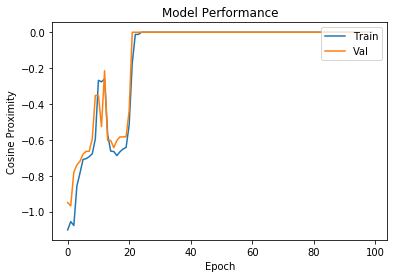

In [146]:
import matplotlib.pyplot as plt

plt.plot(history_lstm.history['cosine_proximity'])
plt.plot(history_lstm.history['val_cosine_proximity'])
plt.title('Model Performance')
plt.ylabel('Cosine Proximity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

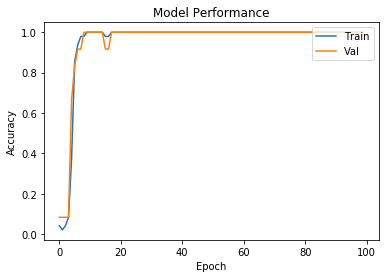

In [147]:
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

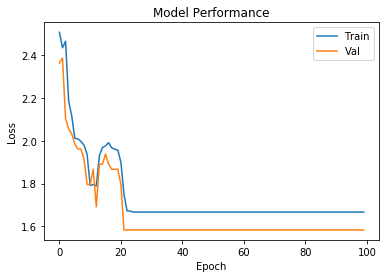

In [148]:
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [27]:
# Trying a dataset with only 2 classes
dataset_copy = pd.concat([dataset[13:38], dataset[50:]], axis=0)
dataset_copy

,app_id,app_full_text,app_smiles,app_inchi,pat_id,pat_full_text,label,pat_smiles,pat_inchi
13,US20170281672,(54) SYSTEMS AND METHODS FOR DELIVERY A61K 38/...,,['\t7729\t7733\tdiges\tSYSTEMATIC\t\t\t\t\t\t\...,US009682102,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(*)\n\n(21)\n(...,1,,['\t42296\t42303\tcarboxyl\tSYSTEMATIC\t\t\t\t...
14,US20170037386,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,['*O[C@@H]([C@@]([C@H]1CC[C@@]2([C@]1(C)CC[C@H...,['\t760\t763\tC12N\tFORMULA\t\t\t\t\t\t\t\t\t\...,US009371517,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,1,"['C=*c1c(*)c(C(C)C)c(c(c1*)*)*', '*c1c(*)c(C(C...",['\t797\t800\tCI2N\tFORMULA\t\t\t\t\t\t\t\t\t\...
15,US20160108377,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,"['*C(=O)*N(C(*)(*)*)C(=O)B', 'C*c1c(*)c(*=C)c(...",['\t635\t638\tC12N\tFORMULA\t\t\t\t\t\t\t\t\t\...,US009371517,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,1,"['C=*c1c(*)c(C(C)C)c(c(c1*)*)*', '*c1c(*)c(C(C...",['\t797\t800\tCI2N\tFORMULA\t\t\t\t\t\t\t\t\t\...
16,US20120101738,(54)\n\n(75)\n\n(73)\n\n(21)\n(22)\n\n(63)\n\n...,,['\t3787\t3789\t10K\tFORMULA\t\t\t\t\t\t\t\t\t...,US008788212,(54) COMPOSITIONS AND METHODS FOR (52) U.S. CI...,1,,['\t181\t184\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...
17,US20190060353,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,"['C*1C*[C](=O)(C1)C', '*CC1CCCC1', '*CC(C([C@H...","[""\t6383\t6435\t0/00,0,0,0,0,0,0,0,0,0,0;'0,0;...",US009717754,(54)\n\n(75)\n\n(73)\n\n(*)\n\n(21)\n(22)\n\n(...,1,"['*C1[C@H](COC2C*C2)OC([C@H](*1C)*)*', '']['CC...",['\t2367\t2370\tWO01\tFORMULA\t\t\t\t\t\t\t\t\...
18,US20060073164,(54)\n\n(76)\n\n(21)\n(22)\n\n(63)\n\nDENGUE A...,,['\t569\t572\tIB04\tFORMULA\t\t\t\t\t\t\t\t\t\...,US008859240,(54)\n\n(75)\n\n(73)\n\n(21)\n\n(22)\n\n(65)\n...,1,"['CCCCC1(CCCC1)*1(C)[C@@H](*)CC1CC', '']",['\t1056\t1059\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\...
19,US20170101479,(54)\n\n(71)\n\n(72)\n\n(21)\n\n(22)\n\n(60)\n...,,['\t815\t818\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...,US009637794,(54) GENETIC PRODUCTS DIFFERENTIALLY\nEXPRESSE...,1,,['\t973\t976\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...
20,US20150252095,(54)\n\n(71)\n\n(72)\n\n(21)\n\n(22)\n\n(63)\n...,['C**C(C([O](*1*2#*(=C[C]31(C*)(OC3*)[O]1*C*O*...,['\t640\t643\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...,US009051394,(54)\n\n(75)\n\n(73)\n\n(21)\n(22)\n\n(86)\n\n...,1,['C**C(*12*C*3*CC(*)(*)CC(*)(*)C(C([O](*)*)C)*...,['\t966\t969\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...
21,US20170275600,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,"['*C(=O)NN(C(=O)B)*', '*C(=O)N*(C(=O)B)*', '']...",['\t858\t861\tC12N\tFORMULA\t\t\t\t\t\t\t\t\t\...,US009371517,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,1,"['C=*c1c(*)c(C(C)C)c(c(c1*)*)*', '*c1c(*)c(C(C...",['\t797\t800\tCI2N\tFORMULA\t\t\t\t\t\t\t\t\t\...
22,US20170240646,(54)\n\n(71)\n\n(72)\n\n(21)\n\n(22)\n\n(62)\n...,"['C1C*CC*1', '']",['\t754\t757\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...,US009637794,(54) GENETIC PRODUCTS DIFFERENTIALLY\nEXPRESSE...,1,,['\t973\t976\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...


In [28]:
dataset_copy.loc[25:37, ['label']] = 1
dataset_copy

,app_id,app_full_text,app_smiles,app_inchi,pat_id,pat_full_text,label,pat_smiles,pat_inchi
13,US20170281672,(54) SYSTEMS AND METHODS FOR DELIVERY A61K 38/...,,['\t7729\t7733\tdiges\tSYSTEMATIC\t\t\t\t\t\t\...,US009682102,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(*)\n\n(21)\n(...,1,,['\t42296\t42303\tcarboxyl\tSYSTEMATIC\t\t\t\t...
14,US20170037386,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,['*O[C@@H]([C@@]([C@H]1CC[C@@]2([C@]1(C)CC[C@H...,['\t760\t763\tC12N\tFORMULA\t\t\t\t\t\t\t\t\t\...,US009371517,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,1,"['C=*c1c(*)c(C(C)C)c(c(c1*)*)*', '*c1c(*)c(C(C...",['\t797\t800\tCI2N\tFORMULA\t\t\t\t\t\t\t\t\t\...
15,US20160108377,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,"['*C(=O)*N(C(*)(*)*)C(=O)B', 'C*c1c(*)c(*=C)c(...",['\t635\t638\tC12N\tFORMULA\t\t\t\t\t\t\t\t\t\...,US009371517,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,1,"['C=*c1c(*)c(C(C)C)c(c(c1*)*)*', '*c1c(*)c(C(C...",['\t797\t800\tCI2N\tFORMULA\t\t\t\t\t\t\t\t\t\...
16,US20120101738,(54)\n\n(75)\n\n(73)\n\n(21)\n(22)\n\n(63)\n\n...,,['\t3787\t3789\t10K\tFORMULA\t\t\t\t\t\t\t\t\t...,US008788212,(54) COMPOSITIONS AND METHODS FOR (52) U.S. CI...,1,,['\t181\t184\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...
17,US20190060353,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,"['C*1C*[C](=O)(C1)C', '*CC1CCCC1', '*CC(C([C@H...","[""\t6383\t6435\t0/00,0,0,0,0,0,0,0,0,0,0;'0,0;...",US009717754,(54)\n\n(75)\n\n(73)\n\n(*)\n\n(21)\n(22)\n\n(...,1,"['*C1[C@H](COC2C*C2)OC([C@H](*1C)*)*', '']['CC...",['\t2367\t2370\tWO01\tFORMULA\t\t\t\t\t\t\t\t\...
18,US20060073164,(54)\n\n(76)\n\n(21)\n(22)\n\n(63)\n\nDENGUE A...,,['\t569\t572\tIB04\tFORMULA\t\t\t\t\t\t\t\t\t\...,US008859240,(54)\n\n(75)\n\n(73)\n\n(21)\n\n(22)\n\n(65)\n...,1,"['CCCCC1(CCCC1)*1(C)[C@@H](*)CC1CC', '']",['\t1056\t1059\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\...
19,US20170101479,(54)\n\n(71)\n\n(72)\n\n(21)\n\n(22)\n\n(60)\n...,,['\t815\t818\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...,US009637794,(54) GENETIC PRODUCTS DIFFERENTIALLY\nEXPRESSE...,1,,['\t973\t976\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...
20,US20150252095,(54)\n\n(71)\n\n(72)\n\n(21)\n\n(22)\n\n(63)\n...,['C**C(C([O](*1*2#*(=C[C]31(C*)(OC3*)[O]1*C*O*...,['\t640\t643\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...,US009051394,(54)\n\n(75)\n\n(73)\n\n(21)\n(22)\n\n(86)\n\n...,1,['C**C(*12*C*3*CC(*)(*)CC(*)(*)C(C([O](*)*)C)*...,['\t966\t969\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...
21,US20170275600,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,"['*C(=O)NN(C(=O)B)*', '*C(=O)N*(C(=O)B)*', '']...",['\t858\t861\tC12N\tFORMULA\t\t\t\t\t\t\t\t\t\...,US009371517,(54)\n\n(71)\n\n(72)\n\n(73)\n\n(21)\n(22)\n\n...,1,"['C=*c1c(*)c(C(C)C)c(c(c1*)*)*', '*c1c(*)c(C(C...",['\t797\t800\tCI2N\tFORMULA\t\t\t\t\t\t\t\t\t\...
22,US20170240646,(54)\n\n(71)\n\n(72)\n\n(21)\n\n(22)\n\n(62)\n...,"['C1C*CC*1', '']",['\t754\t757\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...,US009637794,(54) GENETIC PRODUCTS DIFFERENTIALLY\nEXPRESSE...,1,,['\t973\t976\tCO7K\tFORMULA\t\t\t\t\t\t\t\t\t\...


In [29]:
# Split data into train and test sets and shuffle them
df_copy_2 = pd.concat([dataset_copy['pat_full_text'], dataset_copy['app_full_text'], dataset_copy['label']], axis=1)

X_tr_2, X_test_2, y_tr_2, y_test_2 = train_test_split(df_copy_2.iloc[:, :-1], \
                                                    df_copy_2.iloc[:, -1], \
                                                    test_size=0.2, \
                                                    random_state=42)

In [30]:
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_tr_2, \
                                                    y_tr_2, \
                                                    test_size=0.2, \
                                                    random_state=42)

In [150]:
print(get_data(X_test_2, y_test_2)[0][0].shape)

(10, 1, 700)


In [38]:
def build_siamese_model_2(input_shape):
    """
        Model architecture
    """
    
    # Define the tensors for the two input texts
    left_input = tf.keras.layers.Input(input_shape)
    right_input = tf.keras.layers.Input(input_shape)
    
    # Convolutional Neural Network
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, input_shape=input_shape, \
                                                                 return_sequences=True)))
    model.add(tf.keras.layers.Dense(50, activation='relu'))    
    model.add(tf.keras.layers.Dense(10, activation='relu'))
    
    # Generate the encodings (feature vectors) for the two texts
    encoded_l = model(left_input)
    encoded_r = model(right_input)
    
    # Add a customized layer to compute the absolute difference between the encodings
    L1_layer = tf.keras.layers.Lambda(lambda tensors:tf.keras.backend.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])
    
    # Add a dense layer with a sigmoid unit to generate the similarity score
    prediction = tf.keras.layers.Dense(1, activation='sigmoid')(L1_distance)
    
    # Connect the inputs with the outputs
    siamese_net = tf.keras.Model(inputs=[left_input, right_input], outputs=prediction)
    
    # return the model
    return siamese_net

In [39]:
model_lstm_2 = build_siamese_model_2((1, 700))
model_lstm_2.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 1, 700)]     0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 1, 700)]     0                                            
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 1, 10)        862256      input_7[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 1, 10)        0           sequential_3[0][0]         

In [40]:
model_lstm_2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.0001), \
                   metrics=['accuracy'])

In [41]:
history_lstm_2 = model_lstm_2.fit(get_data(X_train_2, y_train_2)[0], get_data(X_train_2, y_train_2)[1], \
          validation_data=(get_data(X_val_2, y_val_2)[0], get_data(X_val_2, y_val_2)[1]), \
            batch_size=12, epochs=100, verbose=2)

Train on 32 samples, validate on 8 samples
Epoch 1/100
32/32 - 2s - loss: 0.6932 - accuracy: 0.4432 - val_loss: 0.6931 - val_accuracy: 0.5625
Epoch 2/100
32/32 - 0s - loss: 0.6932 - accuracy: 0.5170 - val_loss: 0.6930 - val_accuracy: 0.5938
Epoch 3/100
32/32 - 0s - loss: 0.6931 - accuracy: 0.5284 - val_loss: 0.6930 - val_accuracy: 0.5938
Epoch 4/100
32/32 - 0s - loss: 0.6931 - accuracy: 0.5227 - val_loss: 0.6930 - val_accuracy: 0.6250
Epoch 5/100
32/32 - 0s - loss: 0.6931 - accuracy: 0.5341 - val_loss: 0.6930 - val_accuracy: 0.6250
Epoch 6/100
32/32 - 0s - loss: 0.6931 - accuracy: 0.5455 - val_loss: 0.6930 - val_accuracy: 0.6250
Epoch 7/100
32/32 - 0s - loss: 0.6931 - accuracy: 0.5568 - val_loss: 0.6930 - val_accuracy: 0.6250
Epoch 8/100
32/32 - 0s - loss: 0.6931 - accuracy: 0.5227 - val_loss: 0.6930 - val_accuracy: 0.6250
Epoch 9/100
32/32 - 0s - loss: 0.6931 - accuracy: 0.5114 - val_loss: 0.6930 - val_accuracy: 0.6250
Epoch 10/100
32/32 - 0s - loss: 0.6931 - accuracy: 0.5682 - val_lo

Epoch 83/100
32/32 - 0s - loss: 0.6928 - accuracy: 0.5341 - val_loss: 0.6918 - val_accuracy: 0.6250
Epoch 84/100
32/32 - 0s - loss: 0.6925 - accuracy: 0.5455 - val_loss: 0.6917 - val_accuracy: 0.6250
Epoch 85/100
32/32 - 0s - loss: 0.6928 - accuracy: 0.5114 - val_loss: 0.6917 - val_accuracy: 0.6250
Epoch 86/100
32/32 - 0s - loss: 0.6926 - accuracy: 0.5227 - val_loss: 0.6917 - val_accuracy: 0.6250
Epoch 87/100
32/32 - 0s - loss: 0.6929 - accuracy: 0.5341 - val_loss: 0.6917 - val_accuracy: 0.6250
Epoch 88/100
32/32 - 0s - loss: 0.6926 - accuracy: 0.5568 - val_loss: 0.6916 - val_accuracy: 0.6250
Epoch 89/100
32/32 - 0s - loss: 0.6926 - accuracy: 0.5455 - val_loss: 0.6916 - val_accuracy: 0.6250
Epoch 90/100
32/32 - 0s - loss: 0.6925 - accuracy: 0.5114 - val_loss: 0.6916 - val_accuracy: 0.6250
Epoch 91/100
32/32 - 0s - loss: 0.6929 - accuracy: 0.5455 - val_loss: 0.6916 - val_accuracy: 0.6250
Epoch 92/100
32/32 - 0s - loss: 0.6925 - accuracy: 0.5227 - val_loss: 0.6916 - val_accuracy: 0.6250


In [42]:
loss_2, acc = model_lstm_2.evaluate(get_data(X_test_2, y_test_2)[0], get_data(X_test_2, y_test_2)[1])
print('Test Loss:', loss_2)
print('Accuracy:', acc)

10/10 [==============================] - 1s 56ms/sample - loss: 0.6971 - accuracy: 0.3000
Test Loss: 0.6971459984779358
Accuracy: 0.3


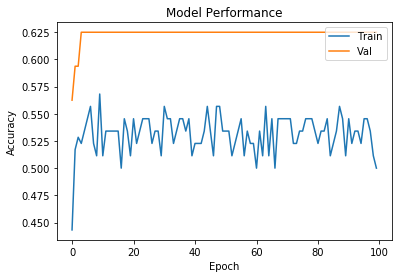

In [43]:
import matplotlib.pyplot as plt

plt.plot(history_lstm_2.history['accuracy'])
plt.plot(history_lstm_2.history['val_accuracy'])
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

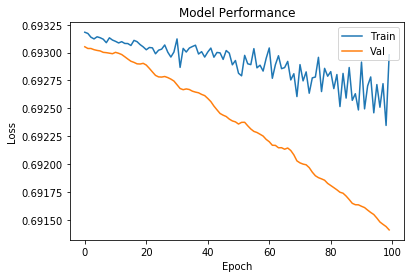

In [44]:
plt.plot(history_lstm_2.history['loss'])
plt.plot(history_lstm_2.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [134]:
def build_siamese_model_3(input_shape):
    """
        Model architecture
    """
    
    # Define the tensors for the two input texts
    left_input = tf.keras.layers.Input(input_shape)
    right_input = tf.keras.layers.Input(input_shape)
    
    # Convolutional Neural Network
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, input_shape=input_shape, \
                                                                 return_sequences=True)))
    model.add(tf.keras.layers.Dense(50, activation='relu'))    
    model.add(tf.keras.layers.Dense(10, activation='relu'))
    
    # Generate the encodings (feature vectors) for the two texts
    encoded_l = model(left_input)
    encoded_r = model(right_input)
    
    # Add a customized layer to compute the absolute difference between the encodings
    L1_layer = tf.keras.layers.Lambda(cosine_distance, output_shape=cos_dist_output_shape)([encoded_l, encoded_r])
    
    # Connect the inputs with the outputs
    siamese_net = tf.keras.Model(inputs=[left_input, right_input], outputs=L1_layer)
    
    # return the model
    return siamese_net

In [135]:
model_lstm_3 = build_siamese_model_3((1, 700))
model_lstm_3.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           [(None, 1, 700)]     0                                            
__________________________________________________________________________________________________
input_22 (InputLayer)           [(None, 1, 700)]     0                                            
__________________________________________________________________________________________________
sequential_10 (Sequential)      (None, 1, 10)        862256      input_21[0][0]                   
                                                                 input_22[0][0]                   
__________________________________________________________________________________________________
lambda_7 (Lambda)               (None, 1, 10)        0           sequential_10[0][0]        

In [136]:
model_lstm_3.compile(loss=contrastive_loss, optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), \
                   metrics=['cosine_proximity', 'accuracy'])

In [137]:
history_lstm_3 = model_lstm_3.fit(get_data(X_train_2, y_train_2)[0], get_data(X_train_2, y_train_2)[1], \
          validation_data=(get_data(X_val_2, y_val_2)[0], get_data(X_val_2, y_val_2)[1]), \
            batch_size=12, epochs=100, verbose=2)

Train on 32 samples, validate on 8 samples
Epoch 1/100
32/32 - 2s - loss: 1.4052 - cosine_proximity: -1.1779e+00 - accuracy: 0.0000e+00 - val_loss: 1.2062 - val_cosine_proximity: -1.3546e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
32/32 - 0s - loss: 1.2776 - cosine_proximity: -1.0841e+00 - accuracy: 0.1477 - val_loss: 0.9438 - val_cosine_proximity: -1.1002e+00 - val_accuracy: 0.5000
Epoch 3/100
32/32 - 0s - loss: 1.2281 - cosine_proximity: -1.0224e+00 - accuracy: 0.4432 - val_loss: 0.8562 - val_cosine_proximity: -1.0036e+00 - val_accuracy: 0.7500
Epoch 4/100
32/32 - 0s - loss: 1.0437 - cosine_proximity: -8.8687e-01 - accuracy: 0.5455 - val_loss: 0.7906 - val_cosine_proximity: -9.5448e-01 - val_accuracy: 0.0000e+00
Epoch 5/100
32/32 - 0s - loss: 0.9406 - cosine_proximity: -7.8325e-01 - accuracy: 0.0227 - val_loss: 0.7906 - val_cosine_proximity: -9.5448e-01 - val_accuracy: 0.0000e+00
Epoch 6/100
32/32 - 0s - loss: 0.9042 - cosine_proximity: -7.5765e-01 - accuracy: 0.0227 - val_loss: 0.768

Epoch 50/100
32/32 - 0s - loss: 0.4938 - cosine_proximity: -6.5341e-02 - accuracy: 1.0000 - val_loss: 0.3750 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000
Epoch 51/100
32/32 - 0s - loss: 0.5000 - cosine_proximity: -7.3864e-02 - accuracy: 1.0000 - val_loss: 0.3750 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000
Epoch 52/100
32/32 - 0s - loss: 0.4927 - cosine_proximity: -7.3864e-02 - accuracy: 1.0000 - val_loss: 0.3750 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000
Epoch 53/100
32/32 - 0s - loss: 0.4922 - cosine_proximity: -6.2500e-02 - accuracy: 1.0000 - val_loss: 0.3750 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000
Epoch 54/100
32/32 - 0s - loss: 0.4914 - cosine_proximity: -7.3864e-02 - accuracy: 1.0000 - val_loss: 0.3750 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000
Epoch 55/100
32/32 - 0s - loss: 0.4932 - cosine_proximity: -6.5341e-02 - accuracy: 1.0000 - val_loss: 0.3750 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.000

32/32 - 0s - loss: 0.4844 - cosine_proximity: -5.3977e-02 - accuracy: 1.0000 - val_loss: 0.3750 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000
Epoch 100/100
32/32 - 0s - loss: 0.4844 - cosine_proximity: -6.8182e-02 - accuracy: 1.0000 - val_loss: 0.3750 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000


In [138]:
loss_3, cosine_proximity_3, acc_3 = model_lstm_3.evaluate(get_data(X_test_2, y_test_2)[0], get_data(X_test_2, y_test_2)[1])
print('Test Loss:', loss_3)
print('Accuracy:', acc_3)

10/10 [==============================] - 1s 59ms/sample - loss: 0.7240 - cosine_proximity: -0.0300 - accuracy: 1.0000
Test Loss: 0.7239999771118164
Accuracy: 1.0


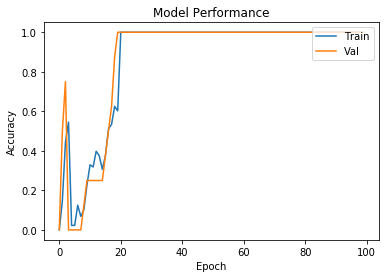

In [139]:
import matplotlib.pyplot as plt

plt.plot(history_lstm_3.history['accuracy'])
plt.plot(history_lstm_3.history['val_accuracy'])
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

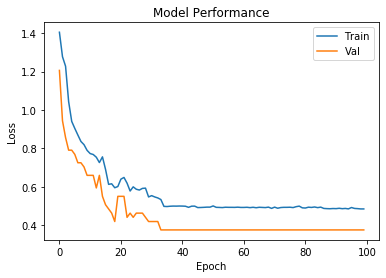

In [140]:
plt.plot(history_lstm_3.history['loss'])
plt.plot(history_lstm_3.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

<hr>

[Top](#toc)

<br>

<a id='section-12'></a>

### - Train CNN + LSTM using document embeddings

In [157]:
def build_siamese_model_4(input_shape):
    """
        Model architecture
    """
    
    # Define the tensors for the two input texts
    left_input = tf.keras.layers.Input(input_shape)
    right_input = tf.keras.layers.Input(input_shape)
    
    # Convolutional Neural Network
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv1D(32, kernel_size=3, padding='same',activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=1))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Conv1D(64, kernel_size=3, padding='same',activation='relu'))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=1))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Conv1D(128, kernel_size=3,padding='same',activation='relu'))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=1))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, input_shape=input_shape, \
                                                                 return_sequences=True)))
    model.add(tf.keras.layers.Dense(64, activation='relu'))    
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    
    # Generate the encodings (feature vectors) for the two texts
    encoded_l = model(left_input)
    encoded_r = model(right_input)
    
    # Add a customized layer to compute the absolute difference between the encodings
    L1_layer = tf.keras.layers.Lambda(cosine_distance, output_shape=cos_dist_output_shape)([encoded_l, encoded_r])
    
    # Connect the inputs with the outputs
    siamese_net = tf.keras.Model(inputs=[left_input, right_input], outputs=L1_layer)
    
    # return the model
    return siamese_net

In [158]:
model_lstm_4 = build_siamese_model_4((1, 700))
model_lstm_4.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           [(None, 1, 700)]     0                                            
__________________________________________________________________________________________________
input_26 (InputLayer)           [(None, 1, 700)]     0                                            
__________________________________________________________________________________________________
sequential_12 (Sequential)      (None, 1, 2)         377890      input_25[0][0]                   
                                                                 input_26[0][0]                   
__________________________________________________________________________________________________
lambda_9 (Lambda)               (None, 1, 2)         0           sequential_12[1][0]        

In [159]:
model_lstm_4.compile(loss=contrastive_loss, optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), \
                   metrics=['cosine_proximity', 'accuracy'])

In [160]:
history_lstm_4 = model_lstm_4.fit(get_data(X_train, y_train)[0], get_data(X_train, y_train)[1], \
          validation_data=(get_data(X_val, y_val)[0], get_data(X_val, y_val)[1]), \
            batch_size=12, epochs=100, verbose=2)

Train on 48 samples, validate on 12 samples
Epoch 1/100
48/48 - 2s - loss: 0.5000 - cosine_proximity: -6.4531e-01 - accuracy: 0.1458 - val_loss: 0.6667 - val_cosine_proximity: -5.8333e-01 - val_accuracy: 0.0000e+00
Epoch 2/100
48/48 - 0s - loss: 0.5000 - cosine_proximity: -6.6667e-01 - accuracy: 0.0000e+00 - val_loss: 0.6667 - val_cosine_proximity: -5.8333e-01 - val_accuracy: 0.0000e+00
Epoch 3/100
48/48 - 0s - loss: 0.6319 - cosine_proximity: -7.1844e-01 - accuracy: 0.1458 - val_loss: 0.6667 - val_cosine_proximity: -5.8333e-01 - val_accuracy: 0.0000e+00
Epoch 4/100
48/48 - 0s - loss: 0.5000 - cosine_proximity: -6.6667e-01 - accuracy: 0.0000e+00 - val_loss: 0.6667 - val_cosine_proximity: -5.8333e-01 - val_accuracy: 0.0000e+00
Epoch 5/100
48/48 - 0s - loss: 0.5000 - cosine_proximity: -6.6667e-01 - accuracy: 0.0000e+00 - val_loss: 0.6667 - val_cosine_proximity: -5.8333e-01 - val_accuracy: 0.0000e+00
Epoch 6/100
48/48 - 0s - loss: 0.5000 - cosine_proximity: -6.6667e-01 - accuracy: 0.0000e

Epoch 49/100
48/48 - 0s - loss: 1.8626e-09 - cosine_proximity: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0833 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000
Epoch 50/100
48/48 - 0s - loss: 0.0000e+00 - cosine_proximity: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0833 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000
Epoch 51/100
48/48 - 0s - loss: -5.5879e-09 - cosine_proximity: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0833 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000
Epoch 52/100
48/48 - 0s - loss: -1.8626e-09 - cosine_proximity: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0833 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000
Epoch 53/100
48/48 - 0s - loss: -1.8626e-09 - cosine_proximity: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0833 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000
Epoch 54/100
48/48 - 0s - loss: 0.0000e+00 - cosine_proximity: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0833 - val_cosine_proximity: 0.0000e+00 

Epoch 98/100
48/48 - 0s - loss: 5.5879e-09 - cosine_proximity: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0833 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000
Epoch 99/100
48/48 - 0s - loss: -1.8626e-09 - cosine_proximity: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0833 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000
Epoch 100/100
48/48 - 0s - loss: -5.5879e-09 - cosine_proximity: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0833 - val_cosine_proximity: 0.0000e+00 - val_accuracy: 1.0000


In [161]:
loss_4, cosine_proximity_4, acc_4 = model_lstm_4.evaluate(get_data(X_test, y_test)[0], get_data(X_test, y_test)[1])
print('Test Loss:', loss_4)
print('Cosine Proximity:', cosine_proximity_4)

15/15 [==============================] - 1s 44ms/sample - loss: -0.0667 - cosine_proximity: 0.0000e+00 - accuracy: 1.0000
Test Loss: -0.06666667014360428
Cosine Proximity: 0.0


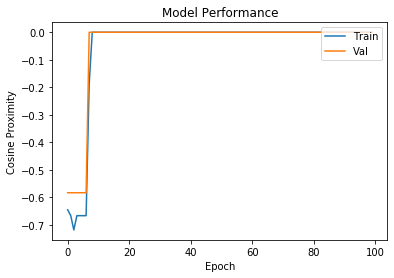

In [162]:
import matplotlib.pyplot as plt

plt.plot(history_lstm_4.history['cosine_proximity'])
plt.plot(history_lstm_4.history['val_cosine_proximity'])
plt.title('Model Performance')
plt.ylabel('Cosine Proximity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

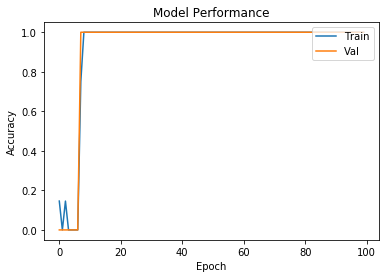

In [163]:
plt.plot(history_lstm_4.history['accuracy'])
plt.plot(history_lstm_4.history['val_accuracy'])
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

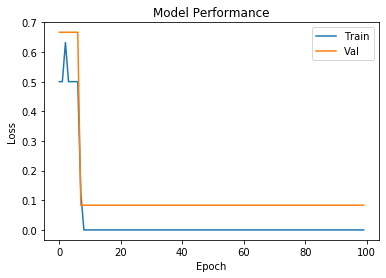

In [164]:
plt.plot(history_lstm_4.history['loss'])
plt.plot(history_lstm_4.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [75]:
def build_siamese_model_5(input_shape):
    """
        Model architecture
    """
    
    # Define the tensors for the two input texts
    left_input = tf.keras.layers.Input(input_shape)
    right_input = tf.keras.layers.Input(input_shape)
    
    # Convolutional Neural Network
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv1D(32, kernel_size=3, padding='same',activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=1))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Conv1D(64, kernel_size=3, padding='same',activation='relu'))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=1))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Conv1D(128, kernel_size=3,padding='same',activation='relu'))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=1))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, input_shape=input_shape, \
                                                                 return_sequences=True)))
    model.add(tf.keras.layers.Dense(64, activation='relu'))    
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    
    # Generate the encodings (feature vectors) for the two texts
    encoded_l = model(left_input)
    encoded_r = model(right_input)
    
    # Add a customized layer to compute the absolute difference between the encodings
    L1_layer = tf.keras.layers.Lambda(lambda tensors:tf.keras.backend.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])
    
    # Add a dense layer with a sigmoid unit to generate the similarity score
    prediction = tf.keras.layers.Dense(1, activation='sigmoid')(L1_distance)
    
    # Connect the inputs with the outputs
    siamese_net = tf.keras.Model(inputs=[left_input, right_input], outputs=prediction)
    # return the model
    return siamese_net

In [76]:
model_lstm_5 = build_siamese_model_5((1, 700))
model_lstm_5.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 1, 700)]     0                                            
__________________________________________________________________________________________________
input_20 (InputLayer)           [(None, 1, 700)]     0                                            
__________________________________________________________________________________________________
sequential_9 (Sequential)       (None, 1, 2)         377890      input_19[0][0]                   
                                                                 input_20[0][0]                   
__________________________________________________________________________________________________
lambda_6 (Lambda)               (None, 1, 2)         0           sequential_9[1][0]         

In [77]:
model_lstm_5.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=0.0001), \
                   metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Recall()])

In [78]:
history_lstm_5 = model_lstm_5.fit(get_data(X_train_2, y_train_2)[0], get_data(X_train_2, y_train_2)[1], \
          validation_data=(get_data(X_val_2, y_val_2)[0], get_data(X_val_2, y_val_2)[1]), \
            batch_size=12, epochs=100, verbose=2)

Train on 32 samples, validate on 8 samples
Epoch 1/100
32/32 - 3s - loss: 0.6932 - accuracy: 0.3750 - auc_2: 0.5000 - recall_1: 0.1176 - val_loss: 0.6932 - val_accuracy: 0.3750 - val_auc_2: 0.5000 - val_recall_1: 0.0000e+00
Epoch 2/100
32/32 - 0s - loss: 0.6931 - accuracy: 0.4773 - auc_2: 0.5000 - recall_1: 0.0000e+00 - val_loss: 0.6931 - val_accuracy: 0.6250 - val_auc_2: 0.5000 - val_recall_1: 1.0000
Epoch 3/100
32/32 - 0s - loss: 0.6932 - accuracy: 0.5568 - auc_2: 0.5000 - recall_1: 1.0000 - val_loss: 0.6931 - val_accuracy: 0.6250 - val_auc_2: 0.5000 - val_recall_1: 1.0000
Epoch 4/100
32/32 - 0s - loss: 0.6931 - accuracy: 0.5341 - auc_2: 0.5000 - recall_1: 1.0000 - val_loss: 0.6931 - val_accuracy: 0.6250 - val_auc_2: 0.5000 - val_recall_1: 1.0000
Epoch 5/100
32/32 - 0s - loss: 0.6931 - accuracy: 0.5455 - auc_2: 0.5000 - recall_1: 1.0000 - val_loss: 0.6931 - val_accuracy: 0.6250 - val_auc_2: 0.5000 - val_recall_1: 1.0000
Epoch 6/100
32/32 - 0s - loss: 0.6931 - accuracy: 0.5455 - auc_2

Epoch 47/100
32/32 - 0s - loss: 0.6931 - accuracy: 0.5114 - auc_2: 0.5000 - recall_1: 1.0000 - val_loss: 0.6928 - val_accuracy: 0.6250 - val_auc_2: 0.5000 - val_recall_1: 1.0000
Epoch 48/100
32/32 - 0s - loss: 0.6931 - accuracy: 0.5341 - auc_2: 0.5000 - recall_1: 1.0000 - val_loss: 0.6928 - val_accuracy: 0.6250 - val_auc_2: 0.5000 - val_recall_1: 1.0000
Epoch 49/100
32/32 - 0s - loss: 0.6931 - accuracy: 0.5341 - auc_2: 0.5000 - recall_1: 1.0000 - val_loss: 0.6928 - val_accuracy: 0.6250 - val_auc_2: 0.5000 - val_recall_1: 1.0000
Epoch 50/100
32/32 - 0s - loss: 0.6931 - accuracy: 0.5114 - auc_2: 0.5000 - recall_1: 1.0000 - val_loss: 0.6928 - val_accuracy: 0.6250 - val_auc_2: 0.5000 - val_recall_1: 1.0000
Epoch 51/100
32/32 - 0s - loss: 0.6931 - accuracy: 0.5227 - auc_2: 0.5000 - recall_1: 1.0000 - val_loss: 0.6928 - val_accuracy: 0.6250 - val_auc_2: 0.5000 - val_recall_1: 1.0000
Epoch 52/100
32/32 - 0s - loss: 0.6931 - accuracy: 0.5227 - auc_2: 0.5000 - recall_1: 1.0000 - val_loss: 0.692

Epoch 94/100
32/32 - 0s - loss: 0.6930 - accuracy: 0.5341 - auc_2: 0.5000 - recall_1: 1.0000 - val_loss: 0.6924 - val_accuracy: 0.6250 - val_auc_2: 0.5000 - val_recall_1: 1.0000
Epoch 95/100
32/32 - 0s - loss: 0.6930 - accuracy: 0.5341 - auc_2: 0.5000 - recall_1: 1.0000 - val_loss: 0.6924 - val_accuracy: 0.6250 - val_auc_2: 0.5000 - val_recall_1: 1.0000
Epoch 96/100
32/32 - 0s - loss: 0.6930 - accuracy: 0.5227 - auc_2: 0.5000 - recall_1: 1.0000 - val_loss: 0.6924 - val_accuracy: 0.6250 - val_auc_2: 0.5000 - val_recall_1: 1.0000
Epoch 97/100
32/32 - 0s - loss: 0.6930 - accuracy: 0.5455 - auc_2: 0.5000 - recall_1: 1.0000 - val_loss: 0.6924 - val_accuracy: 0.6250 - val_auc_2: 0.5000 - val_recall_1: 1.0000
Epoch 98/100
32/32 - 0s - loss: 0.6930 - accuracy: 0.5341 - auc_2: 0.5000 - recall_1: 1.0000 - val_loss: 0.6924 - val_accuracy: 0.6250 - val_auc_2: 0.5000 - val_recall_1: 1.0000
Epoch 99/100
32/32 - 0s - loss: 0.6930 - accuracy: 0.5341 - auc_2: 0.5000 - recall_1: 1.0000 - val_loss: 0.692

In [79]:
loss_5, acc_5, auc, recall = model_lstm_5.evaluate(get_data(X_test_2, y_test_2)[0], get_data(X_test_2, y_test_2)[1])
print('Test Loss:', loss_5)
print('Accuracy:', acc_5)
print('Recall:', recall)

10/10 [==============================] - 1s 75ms/sample - loss: 0.6944 - accuracy: 0.3000 - auc_2: 0.5000 - recall_1: 1.0000
Test Loss: 0.6943782567977905
Accuracy: 0.3
Recall: 1.0


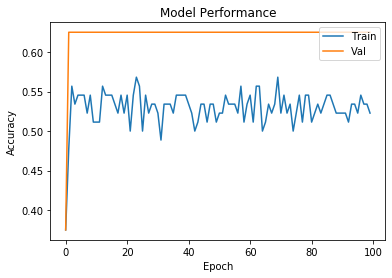

In [80]:
import matplotlib.pyplot as plt

plt.plot(history_lstm_5.history['accuracy'])
plt.plot(history_lstm_5.history['val_accuracy'])
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

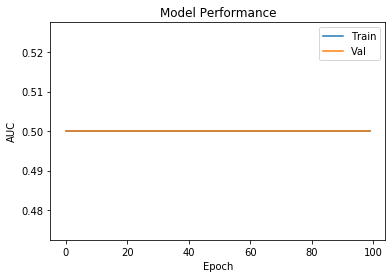

In [82]:
plt.plot(history_lstm_5.history['auc_2'])
plt.plot(history_lstm_5.history['val_auc_2'])
plt.title('Model Performance')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

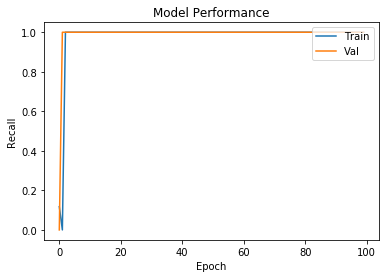

In [85]:
plt.plot(history_lstm_5.history['recall_1'])
plt.plot(history_lstm_5.history['val_recall_1'])
plt.title('Model Performance')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

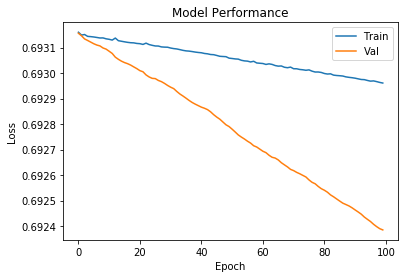

In [86]:
plt.plot(history_lstm_5.history['loss'])
plt.plot(history_lstm_5.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()